<a href="https://colab.research.google.com/github/Mayar215999/data-science-project/blob/main/IBM_DATA_ANALYSIS_MODULE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Lab: Exploratory Data Analysis**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  \
0                                                NaN   
1  Technical documentation;Blogs;Books;Written Tu...   
2  Technical documentation;Blogs;Books;Written Tu...   
3  Stack Overflow;How-to videos;Interactive tutorial   
4  Technical documentation;Blogs;Written Tutorial...   

                                             TechDoc YearsCode YearsCodePro  \
0                                                NaN       NaN          NaN   
1  API document(s) and/or SDK document(s);User gu...        20           17   
2  API document(s) and/or SDK document(s);User gu...        37           27   
3                                                NaN         4          NaN   
4  API document(s) and/or SDK document(s);User gu...         9          NaN   

                 DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy  \
0                    NaN     NaN               NaN        NaN        NaN   
1  Developer, full-stack     NaN               NaN        NaN        NaN   
2   Developer Experience     NaN               NaN        NaN        NaN   
3  Developer, full-stack     NaN               NaN        NaN        NaN   
4  Developer, full-stack     NaN               NaN        NaN        NaN   

  TechEndorse                                            Country Currency  \
0         NaN                           United States of America      NaN   
1         NaN  United Kingdom of Great Britain and Northern I...      NaN   
2         NaN  United Kingdom of Great Britain and Northern I...      NaN   
3         NaN                                             Canada      NaN   
4         NaN                                             Norway      NaN   

   CompTotal                             LanguageHaveWorkedWith  \
0        NaN                                                NaN   
1        NaN  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2        NaN                                                 C#   
3        NaN  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4        NaN            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

                              LanguageWantToWorkWith  \
0                                                NaN   
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2  

In [3]:
missing_employment = df['Employment'].isna().sum()
missing_jobsat = df['JobSat'].isna().sum()
missing_remotework = df['RemoteWork'].isna().sum()

print(f"Missing values in Employment: {missing_employment}")
print(f"Missing values in JobSat: {missing_jobsat}")
print(f"Missing values in RemoteWork: {missing_remotework}")

Missing values in Employment: 0
Missing values in JobSat: 36311
Missing values in RemoteWork: 10631


In [4]:
df.dropna(subset=['Employment', 'JobSat', 'RemoteWork'], inplace=True)

In [5]:
# Example using mean imputation for 'JobSat'
df['JobSat'].fillna(df['JobSat'].mean(), inplace=True)

<ipython-input-5-0ad502767d8c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(df['JobSat'].mean(), inplace=True)


In [6]:
df['YearsCodePro'].describe()


count     28347
unique       52
top           3
freq       2261
Name: YearsCodePro, dtype: object

In [8]:
# Convert 'YearsCodePro' to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Now apply pd.cut
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

In [9]:
median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat'].median()
print(median_jobsat_by_experience)

ExperienceRange
0-5      7.0
5-10     7.0
10-20    7.0
>20      8.0
Name: JobSat, dtype: float64


<ipython-input-9-30c4555c5041>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat'].median()


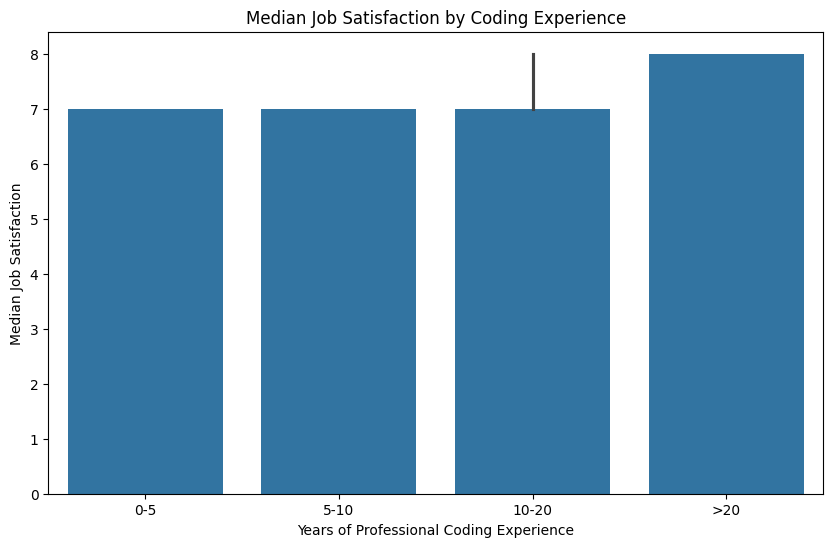

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy and assign it the alias 'np'


plt.figure(figsize=(10, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=df, estimator=np.median) # Now np.median will be recognized
plt.title('Median Job Satisfaction by Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.show()

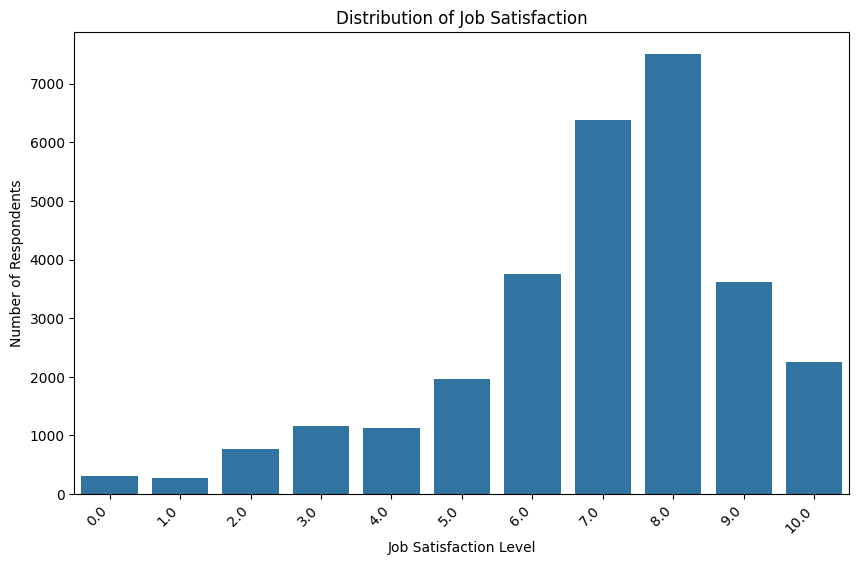

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='JobSat', data=df)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

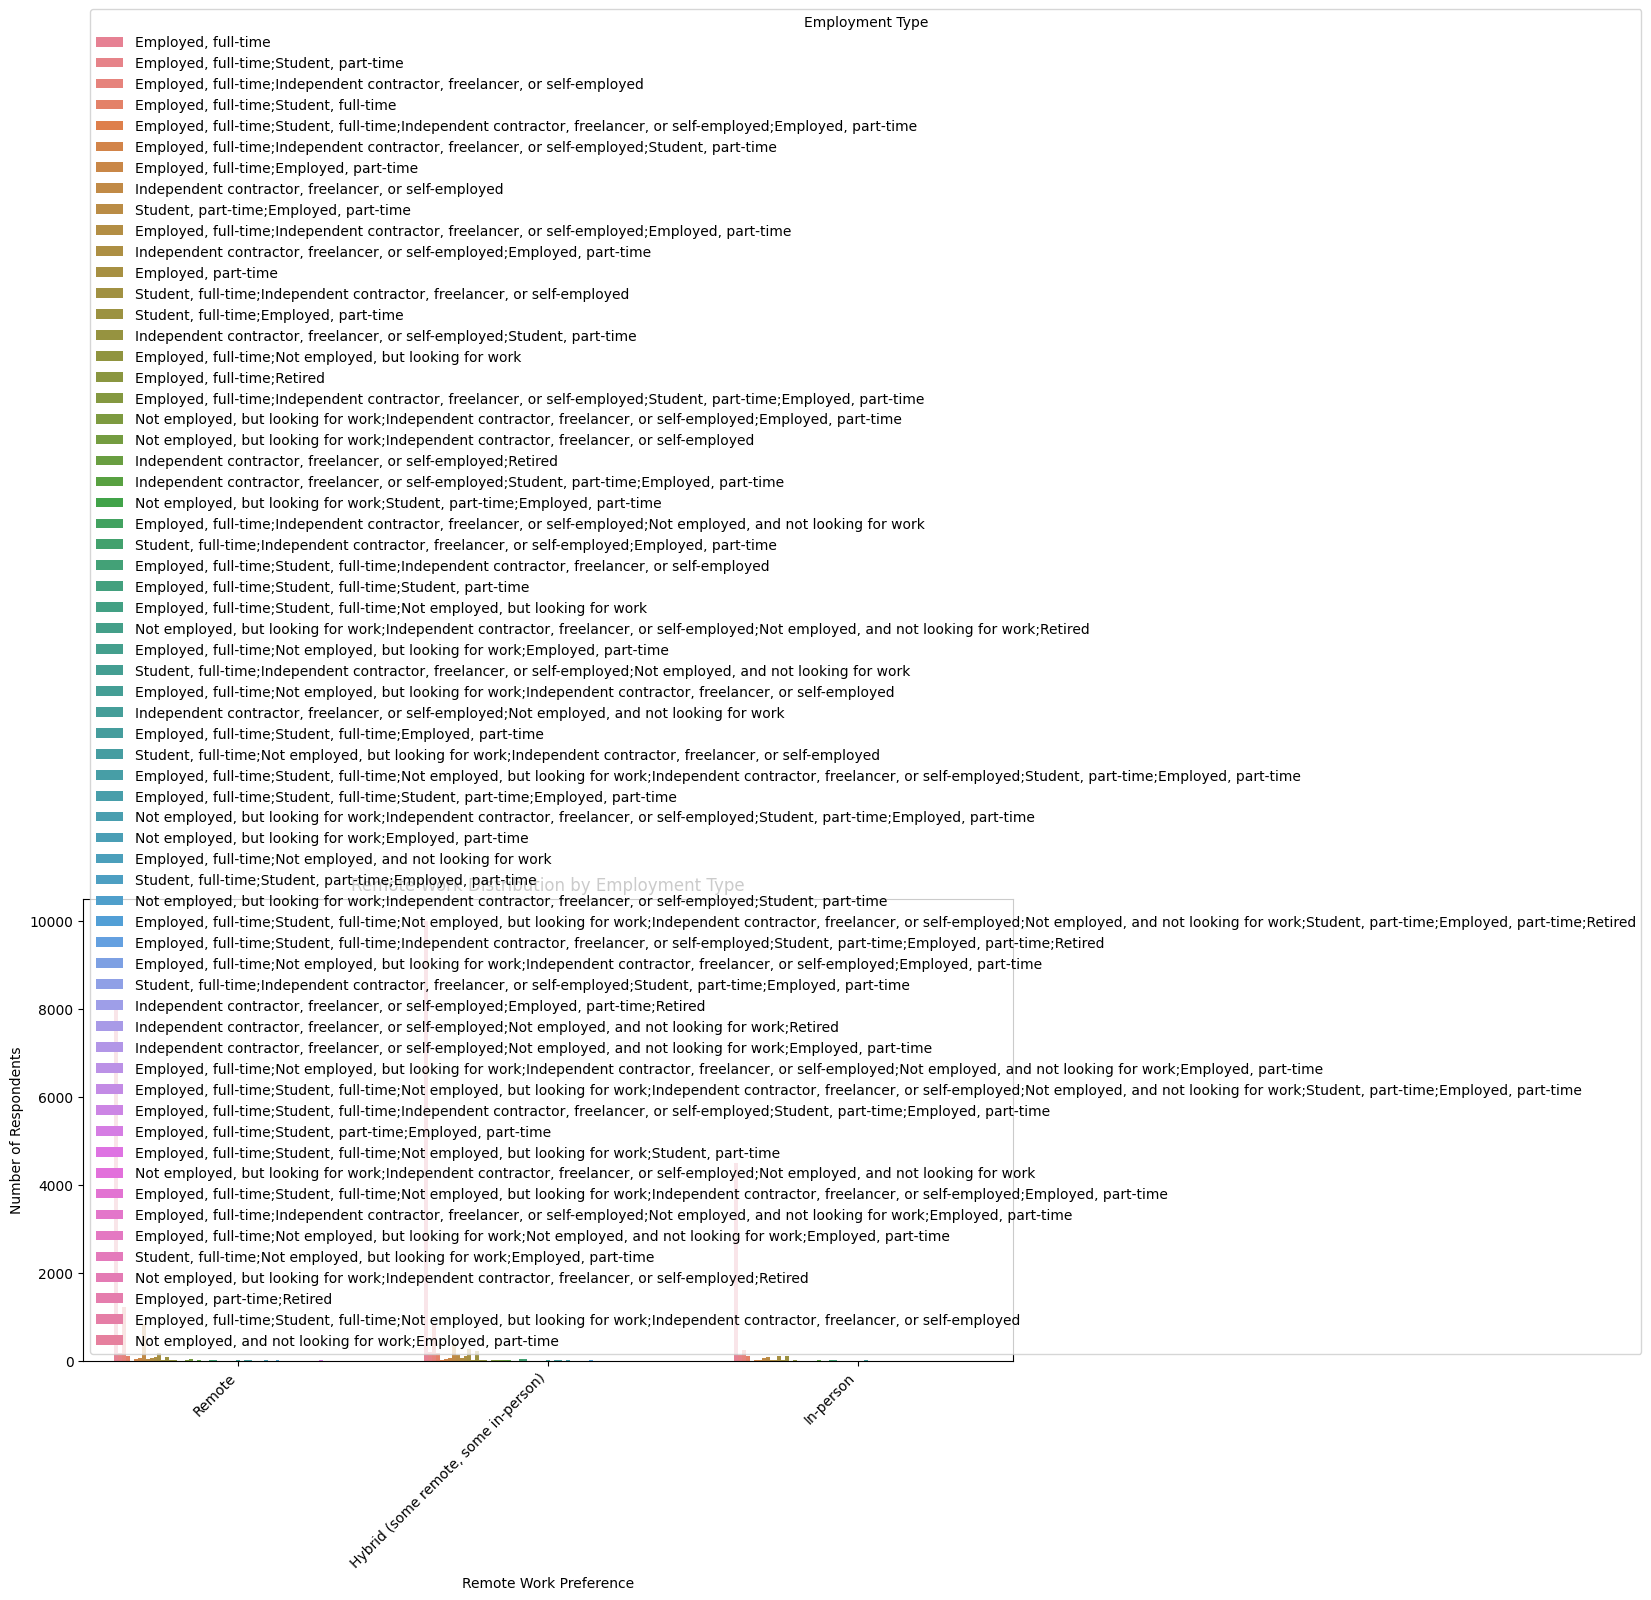


Cross-tabulation of Remote Work Preferences by Job Role and Employment Type:
RemoteWork                                     Hybrid (some remote, some in-person)  \
DevType                                                                               
Data engineer                                                                   324   
DevOps specialist                                                               309   
Developer, back-end                                                            2383   
Developer, desktop or enterprise applications                                   611   
Developer, embedded applications or devices                                     450   
Developer, front-end                                                            660   
Developer, full-stack                                                          4321   
Developer, mobile                                                               417   
Engineering manager                                 

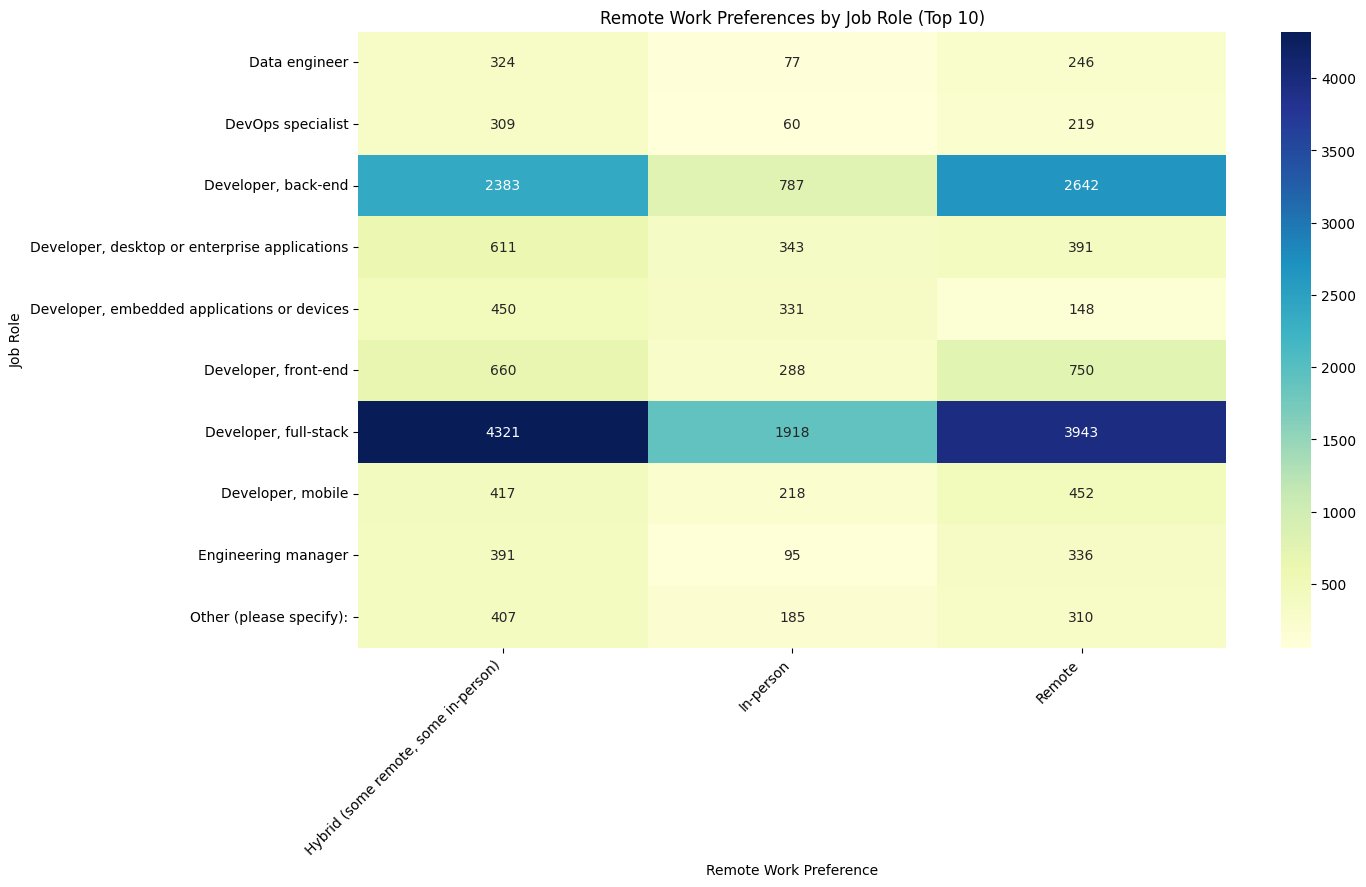

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Count Plot for Remote Work Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='RemoteWork', hue='Employment', data=df)
plt.title('Remote Work Distribution by Employment Type')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type')
plt.show()

# 2. Cross-tabulation of Remote Work Preferences by Employment Type and Job Roles
# (Limited to the top 10 most frequent job roles for better visualization)
top_job_roles = df['DevType'].value_counts().nlargest(10).index
remote_work_by_role = pd.crosstab(df[df['DevType'].isin(top_job_roles)]['DevType'], df['RemoteWork'])

# Display the cross-tabulation
print("\nCross-tabulation of Remote Work Preferences by Job Role and Employment Type:")
print(remote_work_by_role)

# Optional: Visualize the cross-tabulation with a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(remote_work_by_role, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Remote Work Preferences by Job Role (Top 10)')
plt.xlabel('Remote Work Preference')
plt.ylabel('Job Role')
plt.xticks(rotation=45, ha='right')
plt.show()

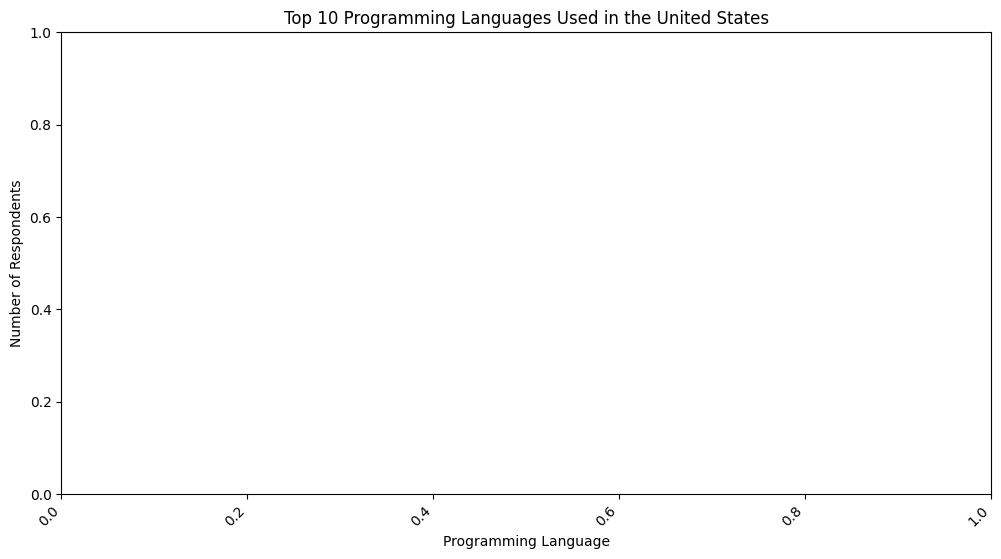

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter data by region (example: United States)
us_df = df[df['Country'] == 'United States']

# 2. Split the 'LanguageHaveWorkedWith' column and count language occurrences
language_counts = us_df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts()

# 3. Get the top 10 languages
top_languages = language_counts.head(10)

# 4. Visualize with a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_languages.index, y=top_languages.values)
plt.title('Top 10 Programming Languages Used in the United States')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

# (Optional) 5. For multiple regions, create a heatmap
# ... (Code for heatmap would be added here if you have data for multiple regions)

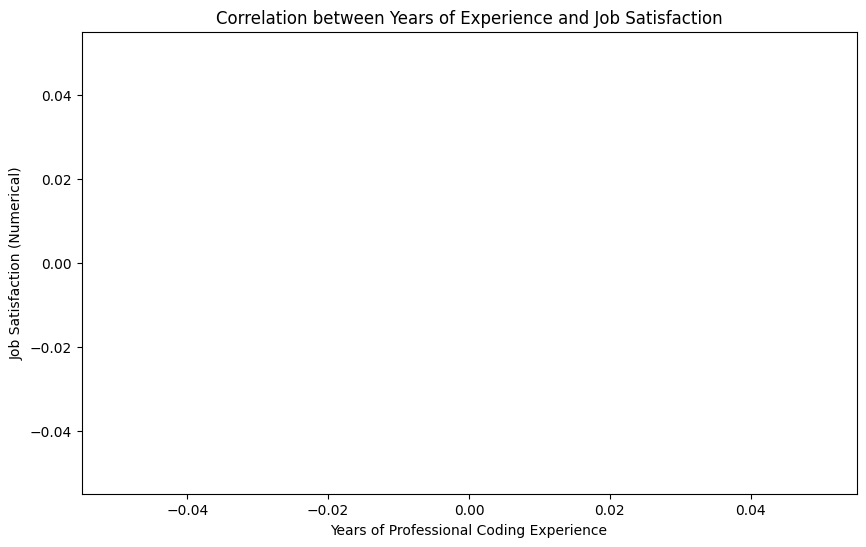

Correlation coefficient: nan


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'JobSat' is an ordinal categorical variable (e.g., 'Very dissatisfied', 'Slightly dissatisfied', ..., 'Very satisfied')
# We need to convert it to numerical values for correlation analysis.

# 1. Create a mapping dictionary for JobSat values to numerical values
jobsat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}

# 2. Apply the mapping to create a new numerical JobSat column
df['JobSatPoints_1'] = df['JobSat'].map(jobsat_mapping)

# 3. Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df)
plt.title('Correlation between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (Numerical)')
plt.show()

# 4. (Optional) Calculate the correlation coefficient
correlation = df['YearsCodePro'].corr(df['JobSatPoints_1'])
print(f"Correlation coefficient: {correlation}")


Cross-tabulation of Educational Background and Employment Type:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 674   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      10496   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    6729   
Primary/elementary school                                            98   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1147   
Secondary school (e.g. American high school, Ge...                  891   
Some college/university study without earning a...                 2285   
Something else                                                      214   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                  

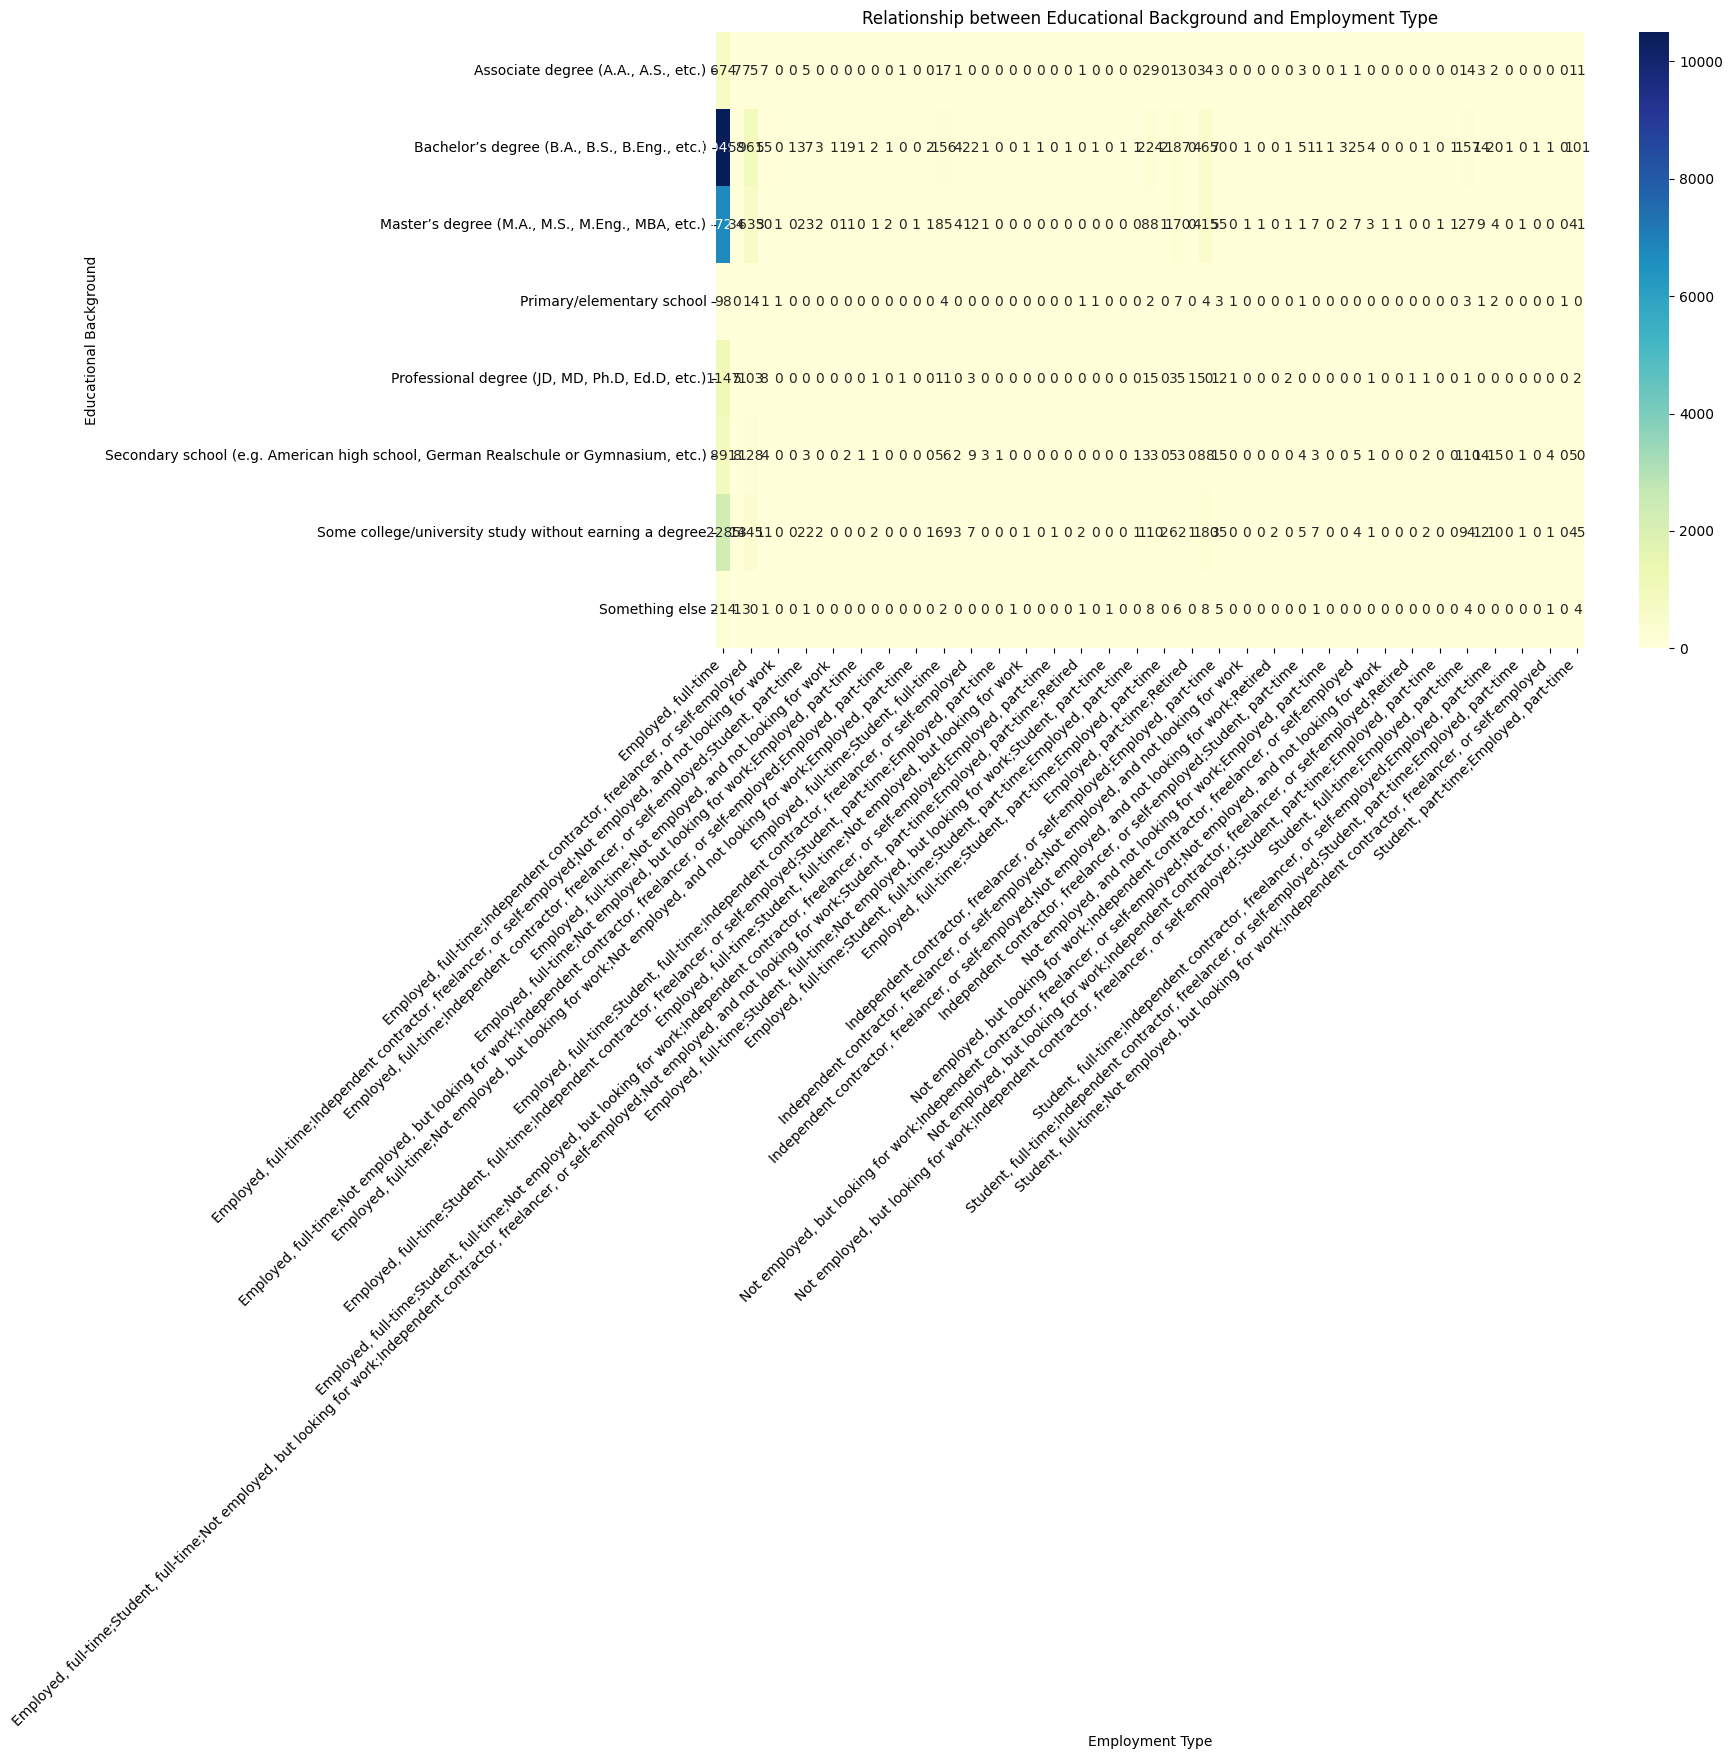

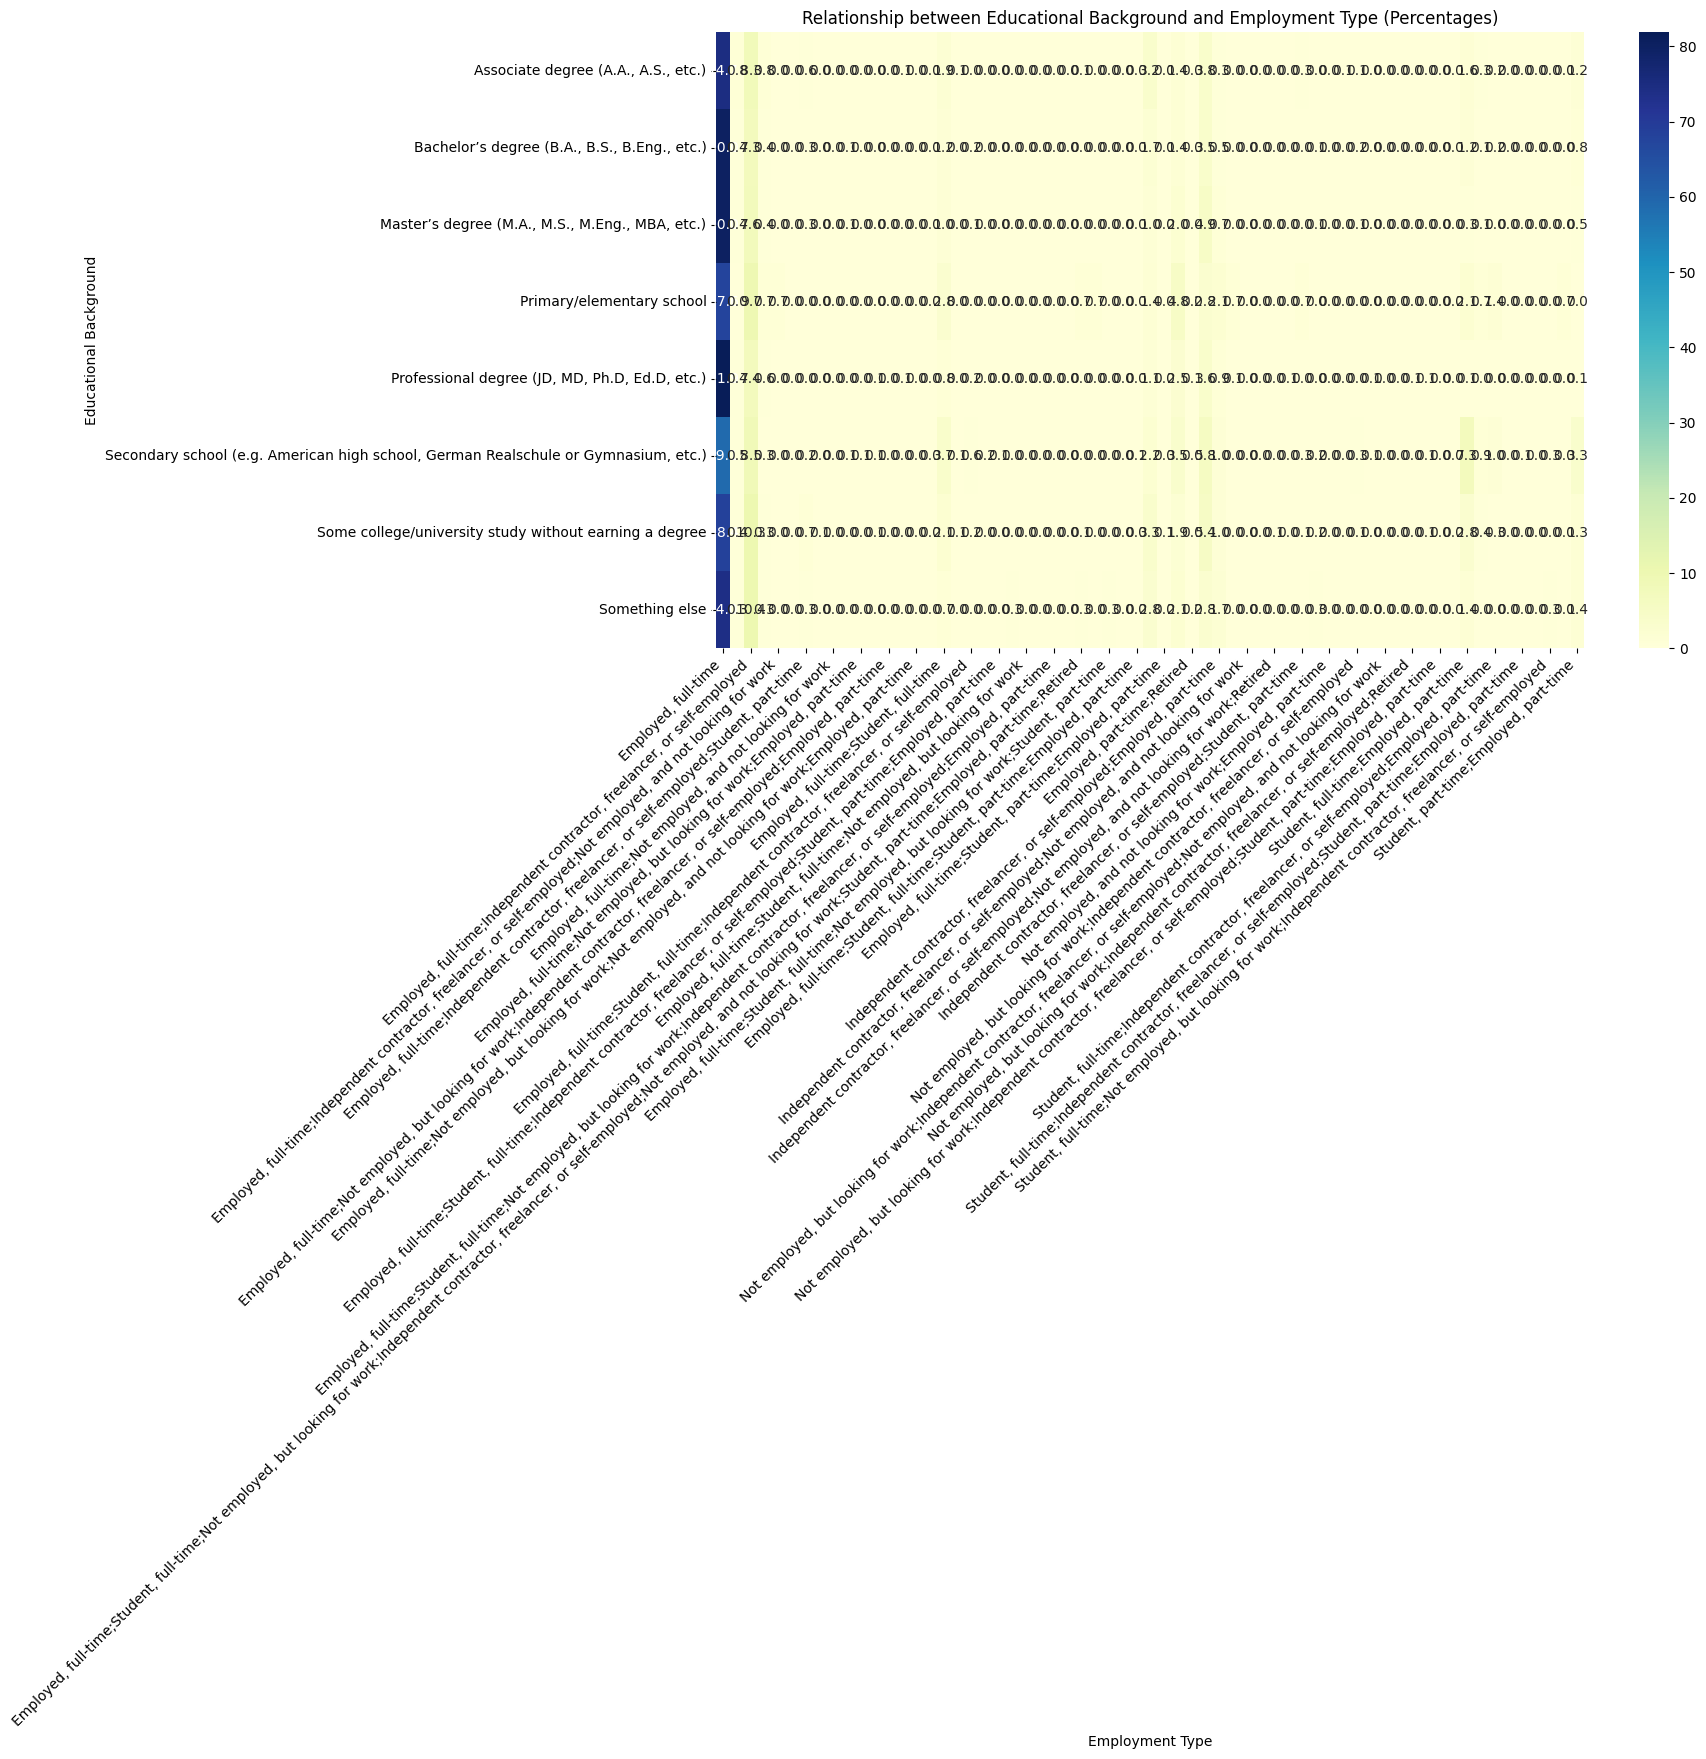

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a cross-tabulation
ed_emp_cross_tab = pd.crosstab(df['EdLevel'], df['Employment'])

# 2. Display the cross-tabulation
print("\nCross-tabulation of Educational Background and Employment Type:")
print(ed_emp_cross_tab)

# 3. Visualize with a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(ed_emp_cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Relationship between Educational Background and Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Educational Background')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels vertical
plt.show()

# 4. (Optional) Calculate percentages for better comparison
ed_emp_percentages = ed_emp_cross_tab.div(ed_emp_cross_tab.sum(axis=1), axis=0) * 100

# 5. (Optional) Visualize percentages with a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(ed_emp_percentages, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Relationship between Educational Background and Employment Type (Percentages)')
plt.xlabel('Employment Type')
plt.ylabel('Educational Background')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

**Finding How The Data Is Distributed**

In [18]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  \
0                                                NaN   
1  Technical documentation;Blogs;Books;Written Tu...   
2  Technical documentation;Blogs;Books;Written Tu...   
3  Stack Overflow;How-to videos;Interactive tutorial   
4  Technical documentation;Blogs;Written Tutorial...   

                                             TechDoc YearsCode YearsCodePro  \
0                                                NaN       NaN          NaN   
1  API document(s) and/or SDK document(s);User gu...        20           17   
2  API document(s) and/or SDK document(s);User gu...        37           27   
3                                                NaN         4          NaN   
4  API document(s) and/or SDK document(s);User gu...         9          NaN   

                 DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy  \
0                    NaN     NaN               NaN        NaN        NaN   
1  Developer, full-stack     NaN               NaN        NaN        NaN   
2   Developer Experience     NaN               NaN        NaN        NaN   
3  Developer, full-stack     NaN               NaN        NaN        NaN   
4  Developer, full-stack     NaN               NaN        NaN        NaN   

  TechEndorse                                            Country Currency  \
0         NaN                           United States of America      NaN   
1         NaN  United Kingdom of Great Britain and Northern I...      NaN   
2         NaN  United Kingdom of Great Britain and Northern I...      NaN   
3         NaN                                             Canada      NaN   
4         NaN                                             Norway      NaN   

   CompTotal                             LanguageHaveWorkedWith  \
0        NaN                                                NaN   
1        NaN  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2        NaN                                                 C#   
3        NaN  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4        NaN            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

                              LanguageWantToWorkWith  \
0                                                NaN   
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2  

In [20]:
import pandas as pd

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display column names
print("Column Names:")
print(df.columns)

# Display data types
print("\nData Types:")
print(df.dtypes)

# Display summary information (including descriptive statistics)
print("\nSummary Information:")
print(df.describe(include='all'))  # Include 'all' to get summary for all columns

Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Summary Information:
          ResponseId                      MainBranch              Age  \
count   65437.000000                           65437            65437   
unique           NaN                            

In [21]:
import pandas as pd

# ... (previous code to load the dataset) ...

# Identify missing values
missing_employment = df['Employment'].isna().sum()
missing_jobsat = df['JobSat'].isna().sum()
missing_remotework = df['RemoteWork'].isna().sum()

print(f"Missing values in Employment: {missing_employment}")
print(f"Missing values in JobSat: {missing_jobsat}")
print(f"Missing values in RemoteWork: {missing_remotework}")

# Remove rows with missing values in specific columns
df.dropna(subset=['Employment', 'JobSat', 'RemoteWork'], inplace=True)

# (Optional) Impute missing values in other columns (e.g., using mean or median)
# Example using mean imputation for 'JobSat' (if you didn't remove rows with missing 'JobSat')
# df['JobSat'].fillna(df['JobSat'].mean(), inplace=True)

Missing values in Employment: 0
Missing values in JobSat: 36311
Missing values in RemoteWork: 10631


In [22]:
# ... (previous code to load and clean the dataset) ...

# Analyze Employment column
employment_counts = df['Employment'].value_counts()
print("\nEmployment Value Counts:")
print(employment_counts)

# Analyze JobSat column
jobsat_counts = df['JobSat'].value_counts()
print("\nJob Satisfaction Value Counts:")
print(jobsat_counts)

# Analyze YearsCodePro column
yearscodepro_counts = df['YearsCodePro'].value_counts()
print("\nYears of Professional Coding Experience Value Counts:")
print(yearscodepro_counts)


Employment Value Counts:
Employment
Employed, full-time                                                                                                                       22534
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                   2291
Independent contractor, freelancer, or self-employed                                                                                       1244
Employed, part-time                                                                                                                         533
Employed, full-time;Student, part-time                                                                                                      509
                                                                                                                                          ...  
Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, pa

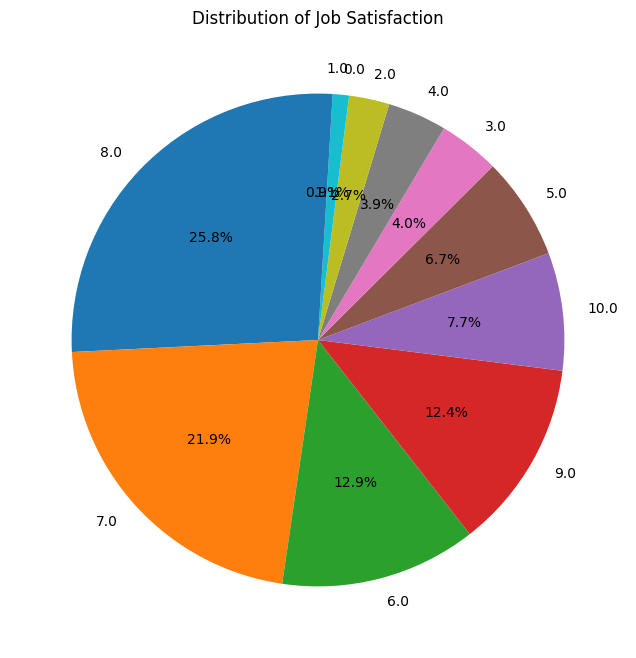

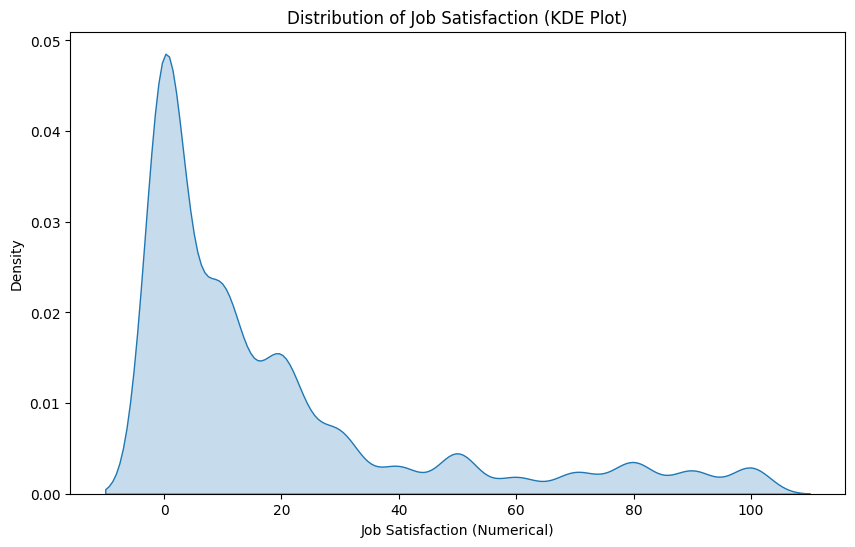

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to load and clean the dataset) ...

# 1. Pie Chart
jobsat_counts = df['JobSat'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(jobsat_counts, labels=jobsat_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Job Satisfaction')
plt.show()

# 2. KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(x='JobSatPoints_1', data=df, fill=True)  # Using the numerical 'JobSatPoints_1' column
plt.title('Distribution of Job Satisfaction (KDE Plot)')
plt.xlabel('Job Satisfaction (Numerical)')
plt.ylabel('Density')
plt.show()

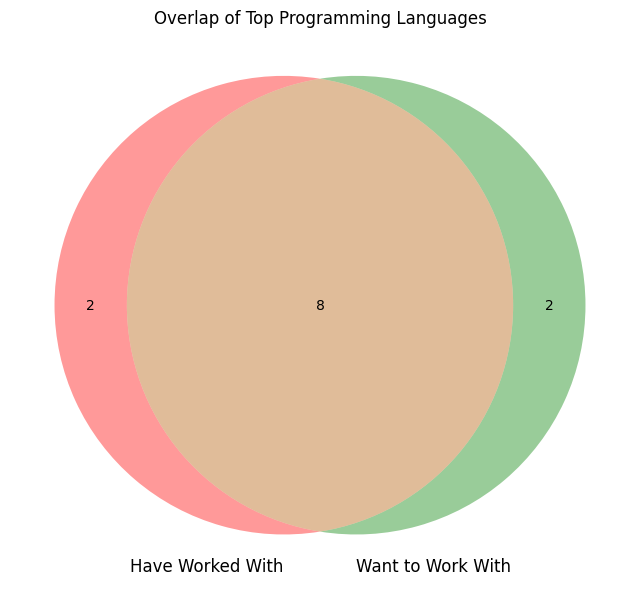

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2  # Import venn2 for Venn diagram

# ... (previous code to load and clean the dataset) ...

# 1. Split and count languages for 'LanguageHaveWorkedWith'
have_worked_languages = df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts()

# 2. Split and count languages for 'LanguageWantToWorkWith'
want_to_work_languages = df['LanguageWantToWorkWith'].str.split(';').explode().value_counts()

# 3. Get the top N languages (e.g., top 10)
top_N = 10
top_have_worked = have_worked_languages.head(top_N).index
top_want_to_work = want_to_work_languages.head(top_N).index

# 4. Create a Venn diagram
# Get the sets of languages for the Venn diagram
set1 = set(top_have_worked)
set2 = set(top_want_to_work)

# Create and display the Venn diagram
plt.figure(figsize=(8, 8))
venn2([set1, set2], set_labels=('Have Worked With', 'Want to Work With'))
plt.title('Overlap of Top Programming Languages')
plt.show()

# 5. (Optional) Create a grouped bar chart
# ... (Code for grouped bar chart would be added here)

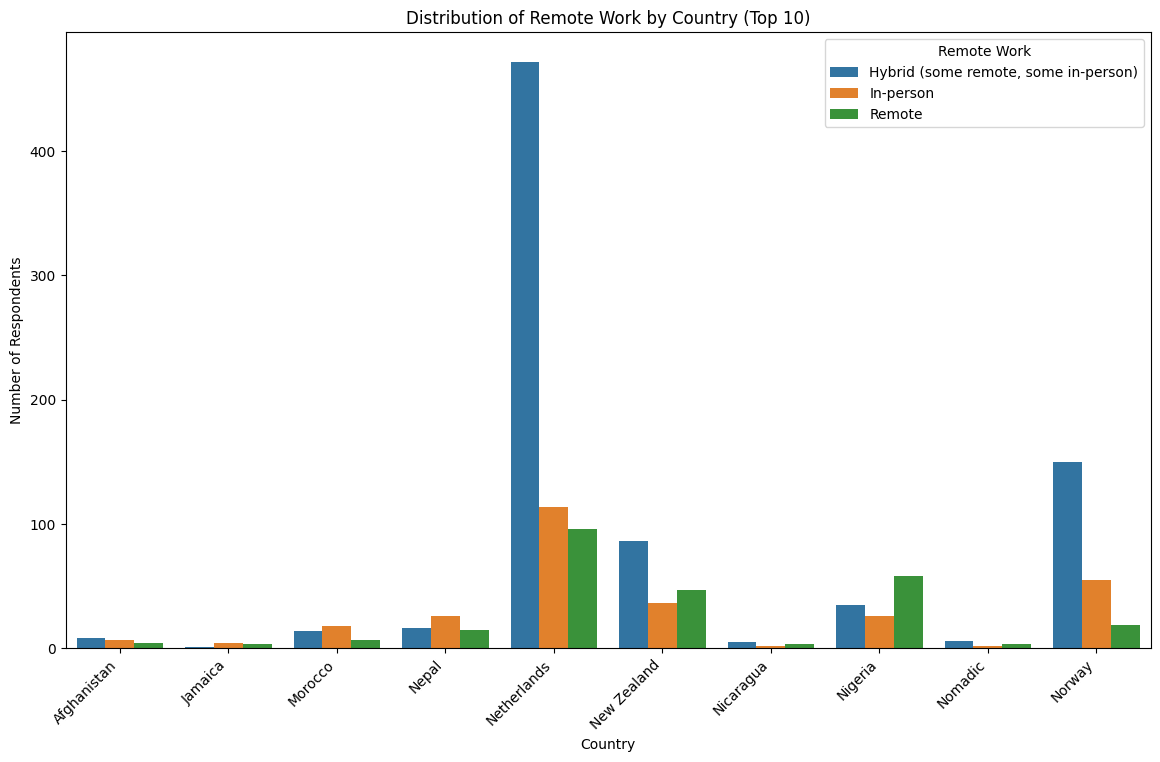

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to load and clean the dataset) ...

# 1. Group data by country and RemoteWork and calculate counts
# Use any existing column for the count, or size() for group size
# Change 'Respondent' to 'ResponseId' (or any other existing column in your DataFrame)
remote_work_by_country = df.groupby(['Country', 'RemoteWork'])['ResponseId'].count().reset_index()
# remote_work_by_country = df.groupby(['Country', 'RemoteWork']).size().reset_index(name='Count') # Alternatively, use size() and rename the column

# 2. Select top N countries (e.g., top 10) for better visualization
top_N_countries = remote_work_by_country['Country'].value_counts().nlargest(10).index
remote_work_top_countries = remote_work_by_country[remote_work_by_country['Country'].isin(top_N_countries)]

# 3. Create the grouped bar chart
plt.figure(figsize=(14, 8))
# Change 'Respondent' to 'ResponseId' in the y parameter
sns.barplot(x='Country', y='ResponseId', hue='RemoteWork', data=remote_work_top_countries)
plt.title('Distribution of Remote Work by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work')
plt.show()

Spearman correlation coefficient between YearsCodePro and JobSat: nan


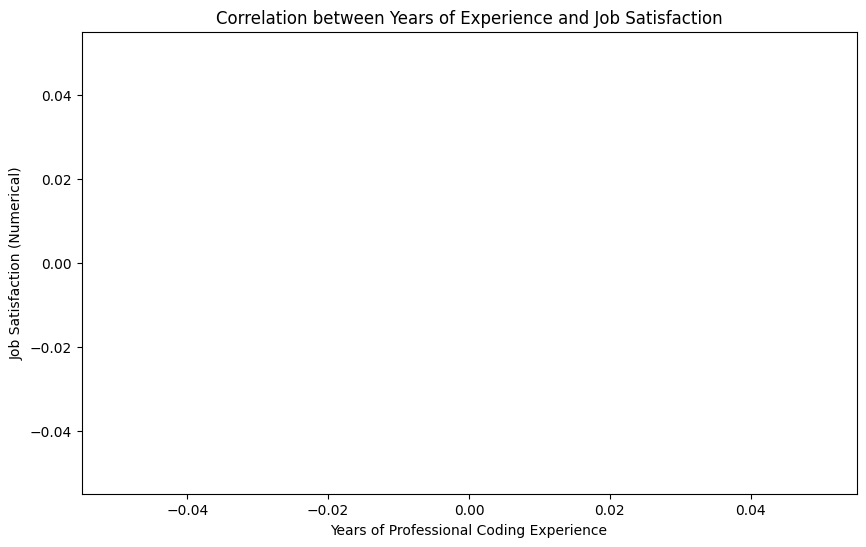

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import numpy for statistical calculations

# ... (previous code to load and clean the dataset) ...

# 1. Convert 'YearsCodePro' to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 2. Create a mapping dictionary for JobSat values to numerical values
jobsat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}

# 3. Apply the mapping to create a new numerical JobSat column
df['JobSatPoints'] = df['JobSat'].map(jobsat_mapping)

# 4. Calculate the Spearman correlation coefficient
correlation = df['YearsCodePro'].corr(df['JobSatPoints'], method='spearman')

# 5. Print the correlation coefficient
print(f"Spearman correlation coefficient between YearsCodePro and JobSat: {correlation}")

# 6. (Optional) Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints', data=df)
plt.title('Correlation between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (Numerical)')
plt.show()


Cross-tabulation of Educational Background and Employment Type:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 674   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      10496   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    6729   
Primary/elementary school                                            98   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1147   
Secondary school (e.g. American high school, Ge...                  891   
Some college/university study without earning a...                 2285   
Something else                                                      214   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                  

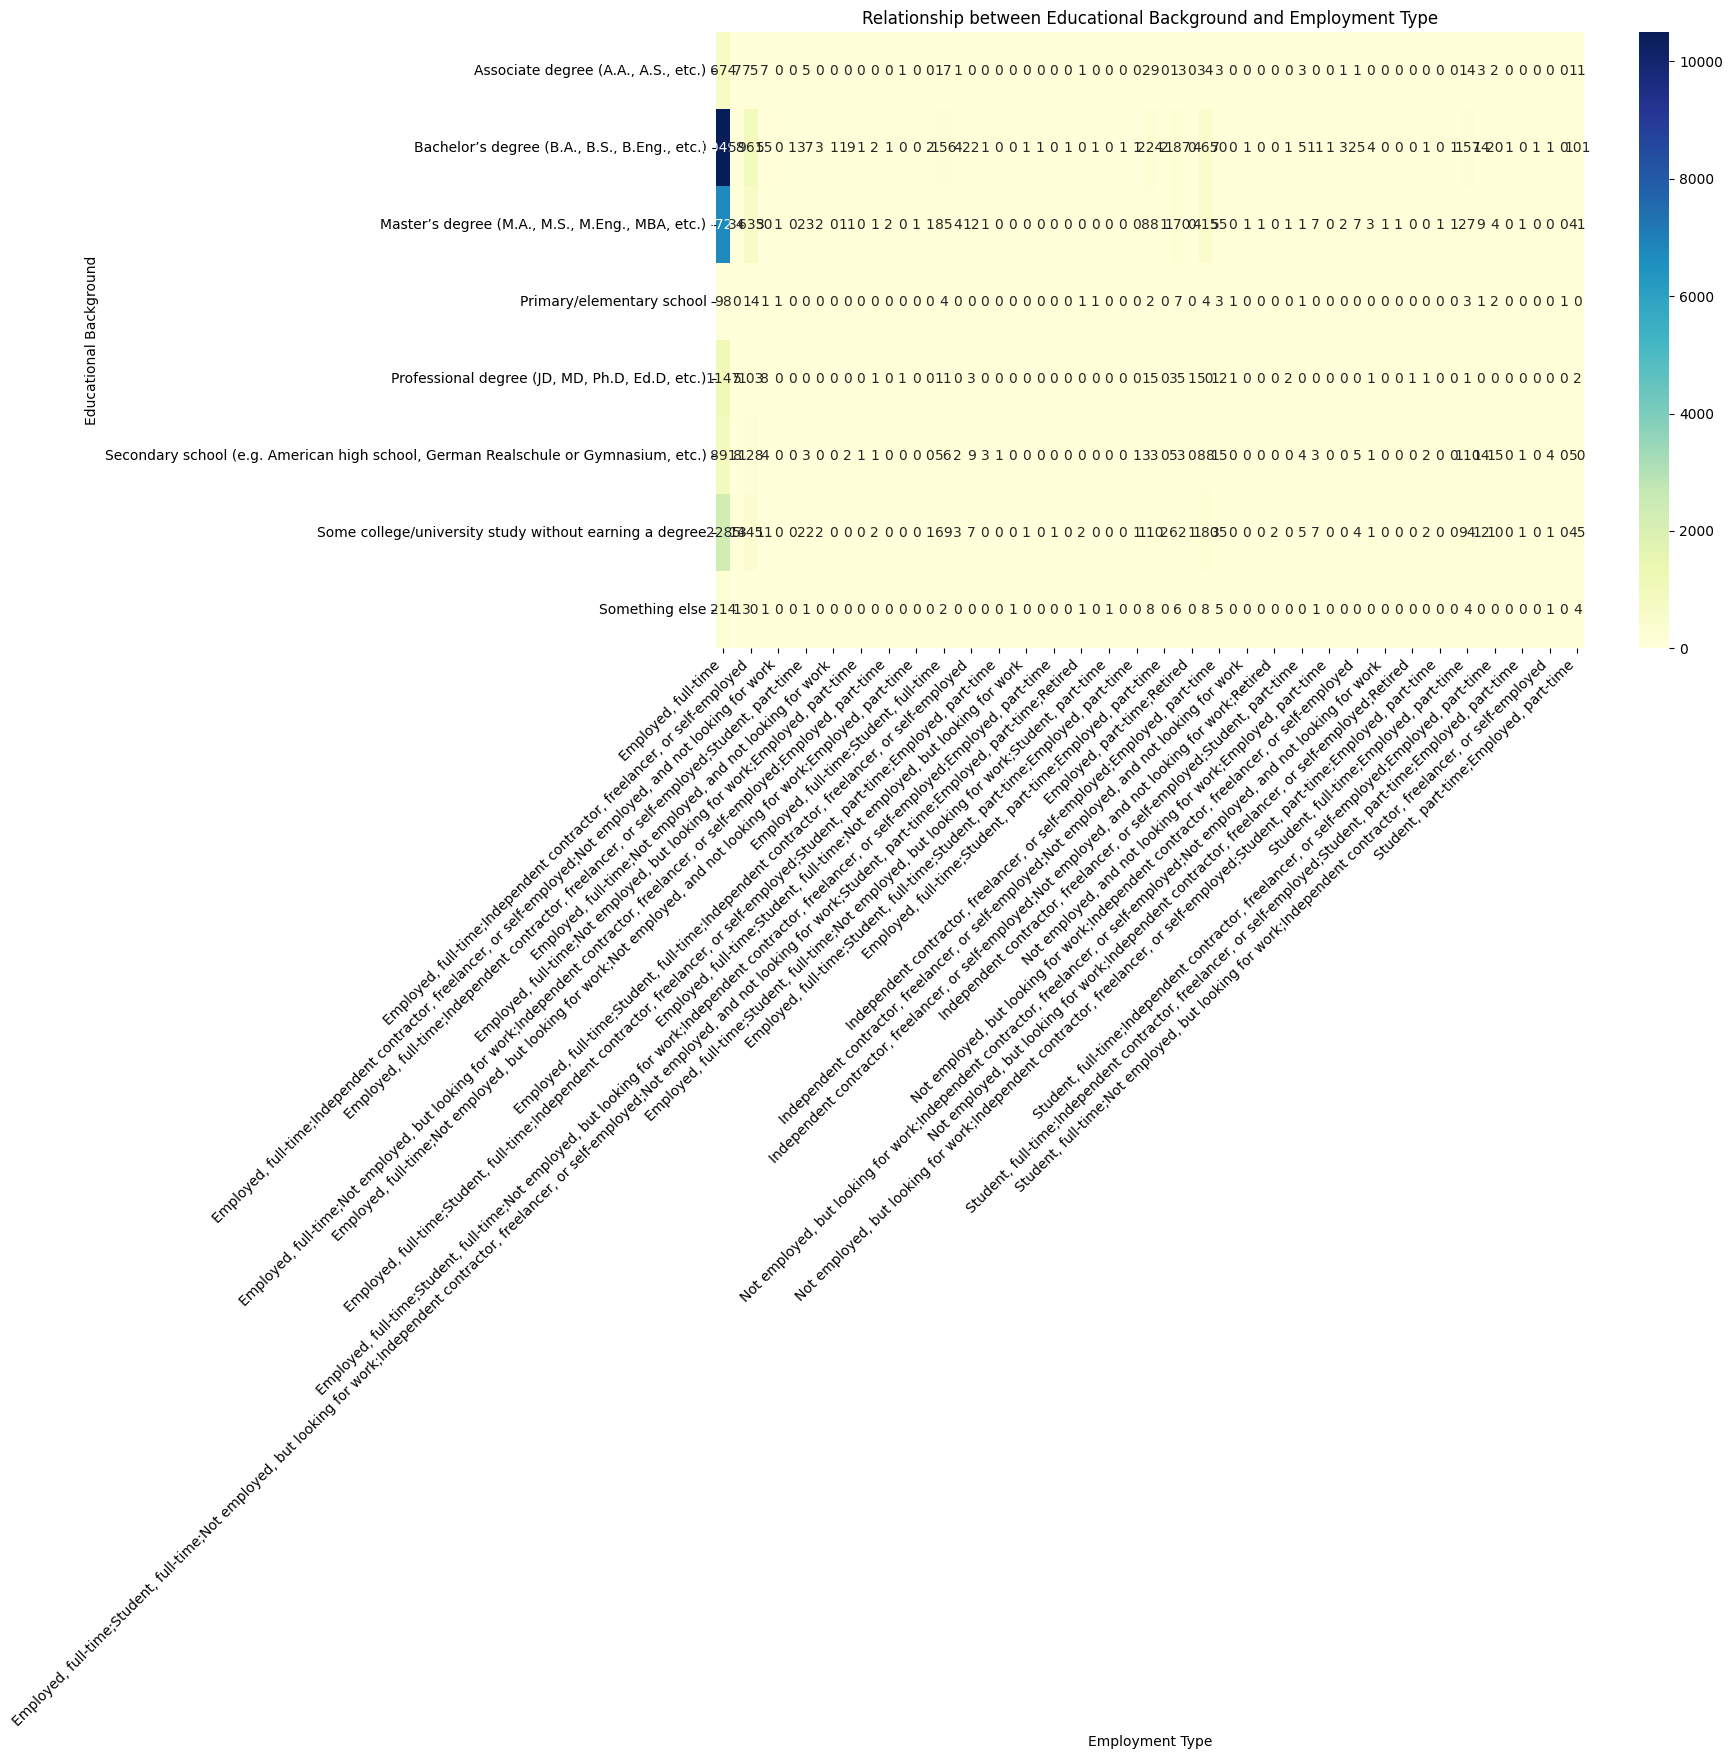

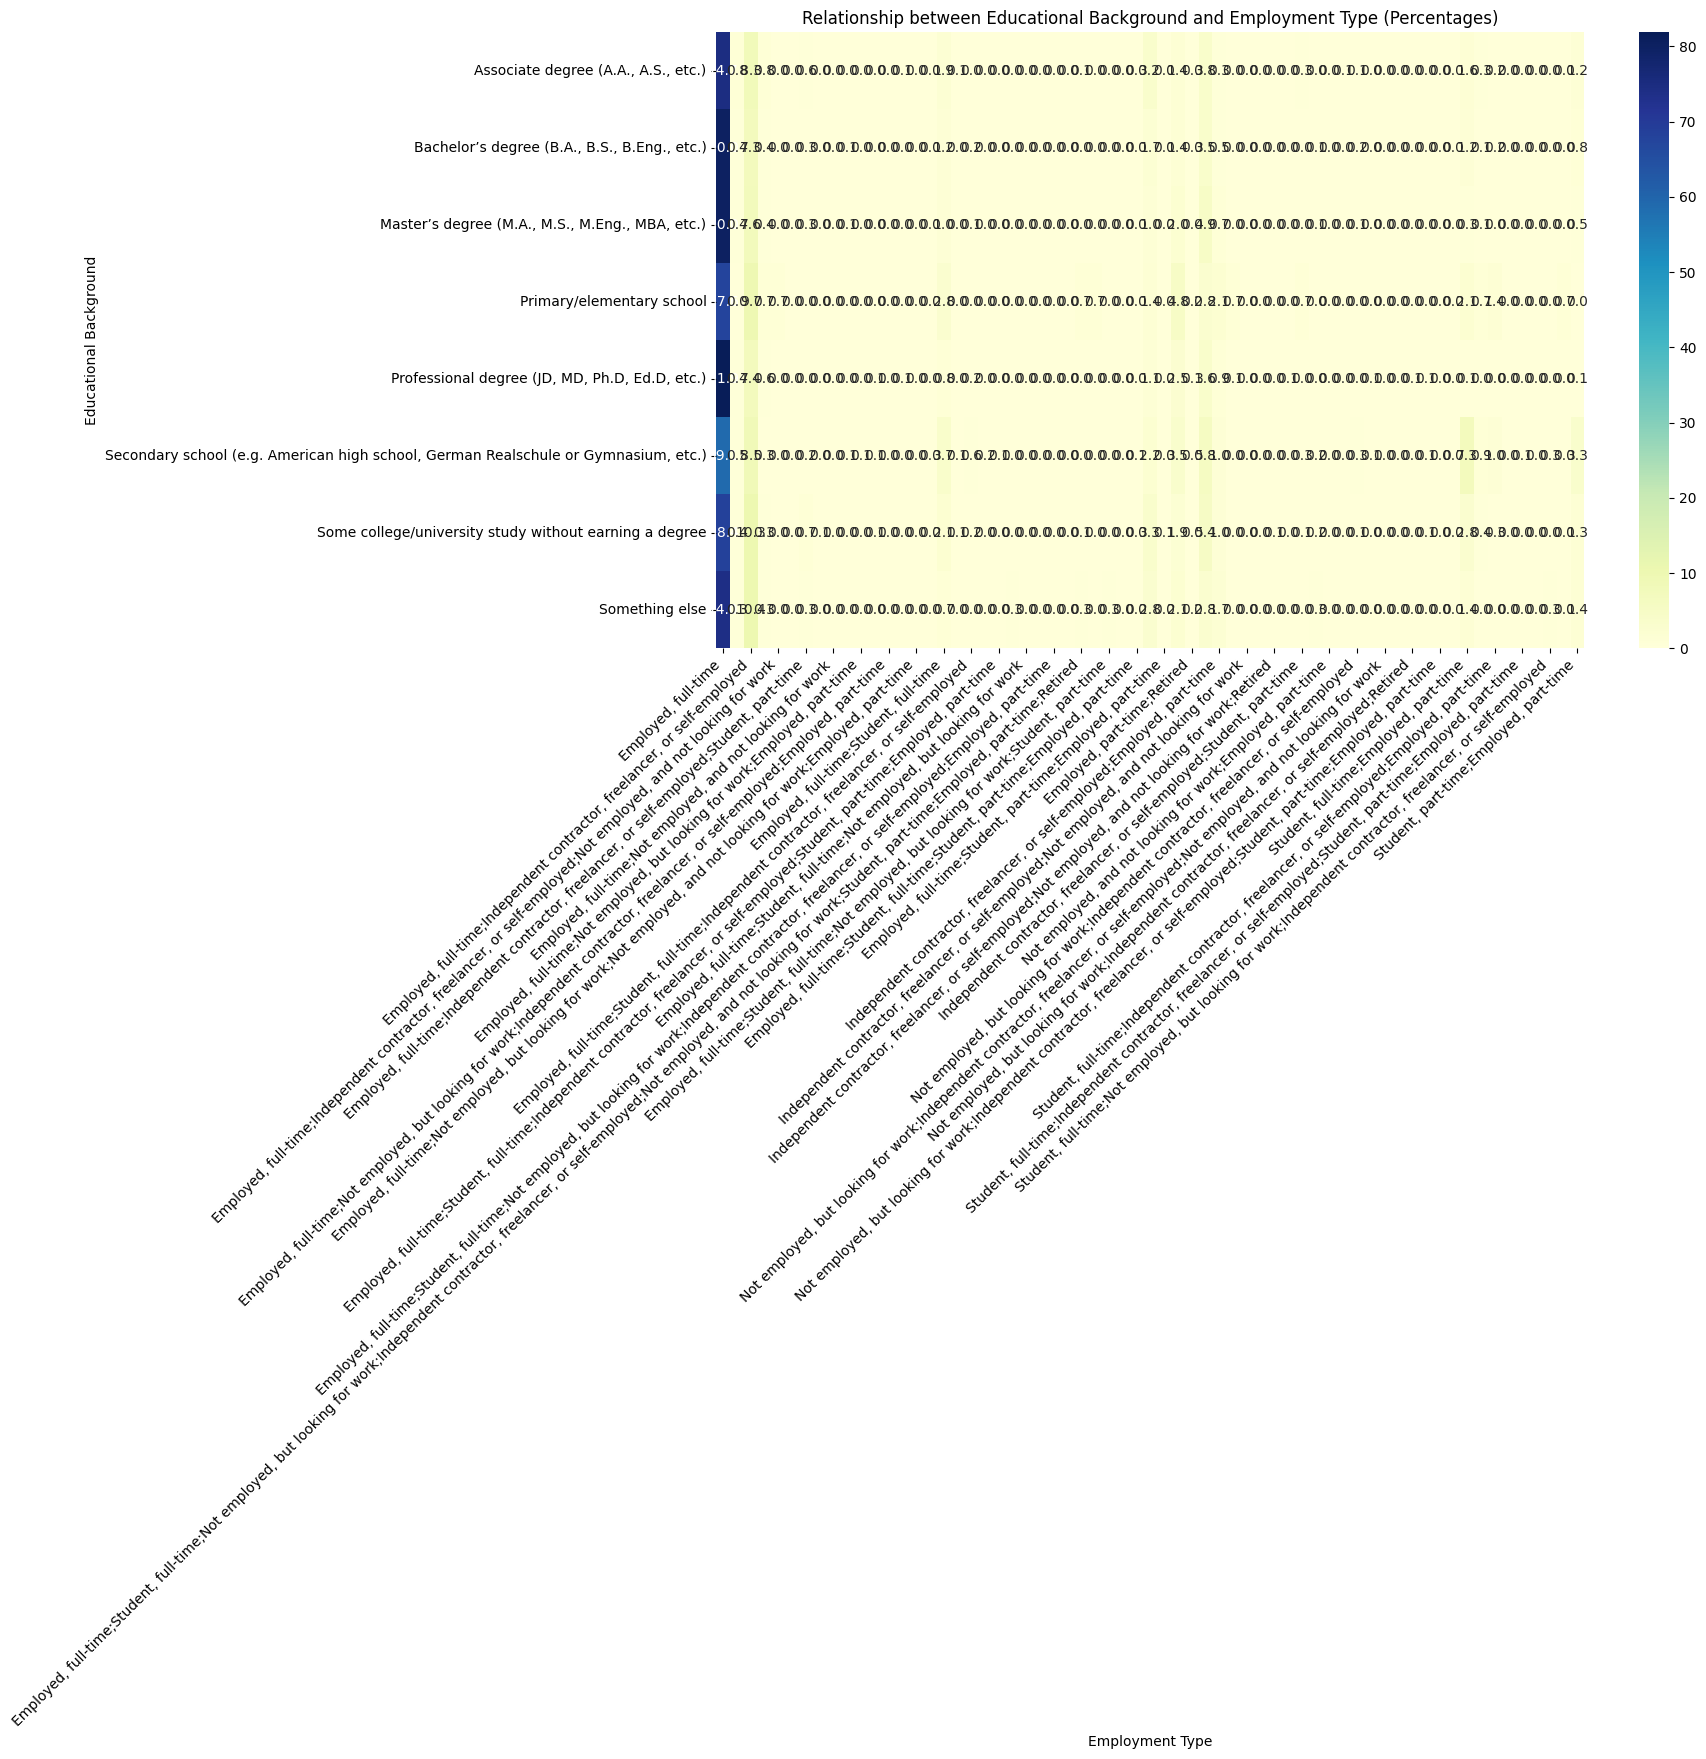

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to load and clean the dataset) ...

# 1. Create a cross-tabulation
ed_emp_cross_tab = pd.crosstab(df['EdLevel'], df['Employment'])

# 2. Display the cross-tabulation
print("\nCross-tabulation of Educational Background and Employment Type:")
print(ed_emp_cross_tab)

# 3. Visualize with a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(ed_emp_cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Relationship between Educational Background and Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Educational Background')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels vertical
plt.show()

# 4. (Optional) Calculate percentages for better comparison
ed_emp_percentages = ed_emp_cross_tab.div(ed_emp_cross_tab.sum(axis=1), axis=0) * 100

# 5. (Optional) Visualize percentages with a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(ed_emp_percentages, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Relationship between Educational Background and Employment Type (Percentages)')
plt.xlabel('Employment Type')
plt.ylabel('Educational Background')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [30]:
# ... (previous code to load, clean, and analyze the dataset) ...

# Export the cleaned DataFrame to a CSV file
df.to_csv('cleaned_survey_data.csv', index=False)

**Finding Outliers**

In [31]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  \
0                                                NaN   
1  Technical documentation;Blogs;Books;Written Tu...   
2  Technical documentation;Blogs;Books;Written Tu...   
3  Stack Overflow;How-to videos;Interactive tutorial   
4  Technical documentation;Blogs;Written Tutorial...   

                                             TechDoc YearsCode YearsCodePro  \
0                                                NaN       NaN          NaN   
1  API document(s) and/or SDK document(s);User gu...        20           17   
2  API document(s) and/or SDK document(s);User gu...        37           27   
3                                                NaN         4          NaN   
4  API document(s) and/or SDK document(s);User gu...         9          NaN   

                 DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy  \
0                    NaN     NaN               NaN        NaN        NaN   
1  Developer, full-stack     NaN               NaN        NaN        NaN   
2   Developer Experience     NaN               NaN        NaN        NaN   
3  Developer, full-stack     NaN               NaN        NaN        NaN   
4  Developer, full-stack     NaN               NaN        NaN        NaN   

  TechEndorse                                            Country Currency  \
0         NaN                           United States of America      NaN   
1         NaN  United Kingdom of Great Britain and Northern I...      NaN   
2         NaN  United Kingdom of Great Britain and Northern I...      NaN   
3         NaN                                             Canada      NaN   
4         NaN                                             Norway      NaN   

   CompTotal                             LanguageHaveWorkedWith  \
0        NaN                                                NaN   
1        NaN  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2        NaN                                                 C#   
3        NaN  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4        NaN            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

                              LanguageWantToWorkWith  \
0                                                NaN   
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2  

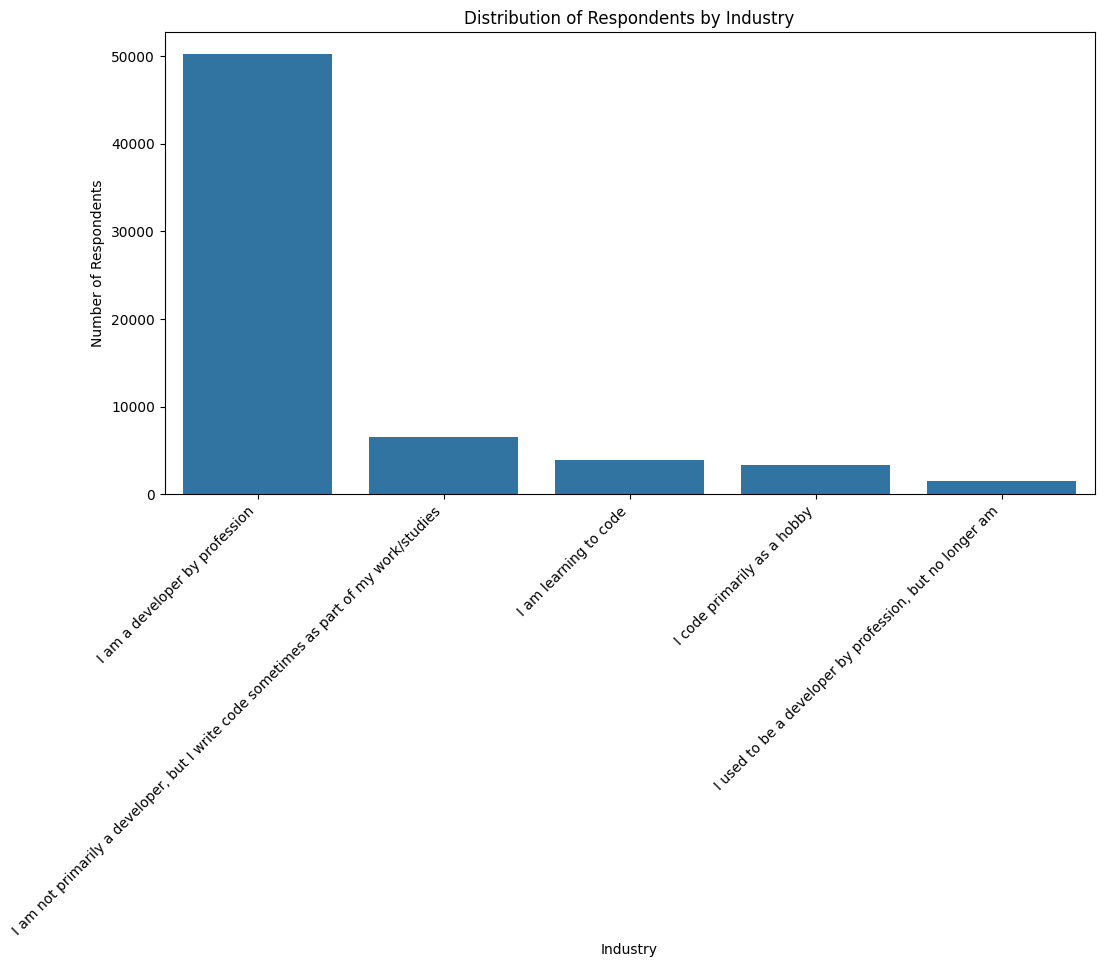


Top 5 Industries:
MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64


In [33]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Assuming 'Industry' is the column containing industry information
industry_counts = df['MainBranch'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x=industry_counts.index, y=industry_counts.values)
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Identifying notable trends (example)
top_industries = industry_counts.head(5)  # Get the top 5 industries
print(f"\nTop 5 Industries:\n{top_industries}")

In [34]:
import pandas as pd

# ... (previous code to load and clean the dataset) ...

# 1. Calculate basic statistics for 'ConvertedCompYearly'
comp_stats = df['ConvertedCompYearly'].describe()
print("\nCompensation Statistics:")
print(comp_stats)

# 2. Calculate the threshold for outliers (e.g., 3 standard deviations above the mean)
comp_mean = comp_stats['mean']
comp_std = comp_stats['std']
outlier_threshold = comp_mean + (3 * comp_std)

# 3. Identify outliers
high_comp_outliers = df[df['ConvertedCompYearly'] > outlier_threshold]

# 4. Display the outliers (or a subset)
print("\nRespondents with High Compensation (Outliers):")
print(high_comp_outliers[['ResponseId', 'ConvertedCompYearly']].head())  # Display a subset for brevity


Compensation Statistics:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Respondents with High Compensation (Outliers):
      ResponseId  ConvertedCompYearly
529          530             650000.0
828          829            1000000.0
1932        1933             945000.0
2171        2172             750000.0
2187        2188            2000000.0



Number of outliers in ConvertedCompYearly: 978


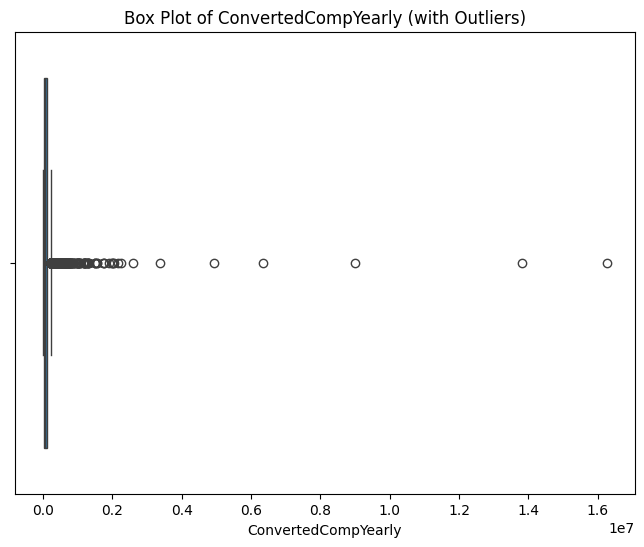

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to load and clean the dataset) ...

# 1. Calculate IQR for 'ConvertedCompYearly'
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# 2. Determine upper and lower bounds for outliers
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# 3. Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# 4. Count outliers
num_outliers = len(outliers)
print(f"\nNumber of outliers in ConvertedCompYearly: {num_outliers}")

# 5. Visualize outliers using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box Plot of ConvertedCompYearly (with Outliers)')
plt.xlabel('ConvertedCompYearly')
plt.show()

In [36]:
import pandas as pd

# ... (previous code to load, clean, and identify outliers) ...

# 1. Create a new DataFrame without outliers
df_no_outliers = df[~df['ConvertedCompYearly'].isin(outliers['ConvertedCompYearly'])]

# 2. Validate the size of the new DataFrame
print(f"\nOriginal DataFrame size: {df.shape}")
print(f"New DataFrame size (without outliers): {df_no_outliers.shape}")


Original DataFrame size: (65437, 114)
New DataFrame size (without outliers): (64459, 114)


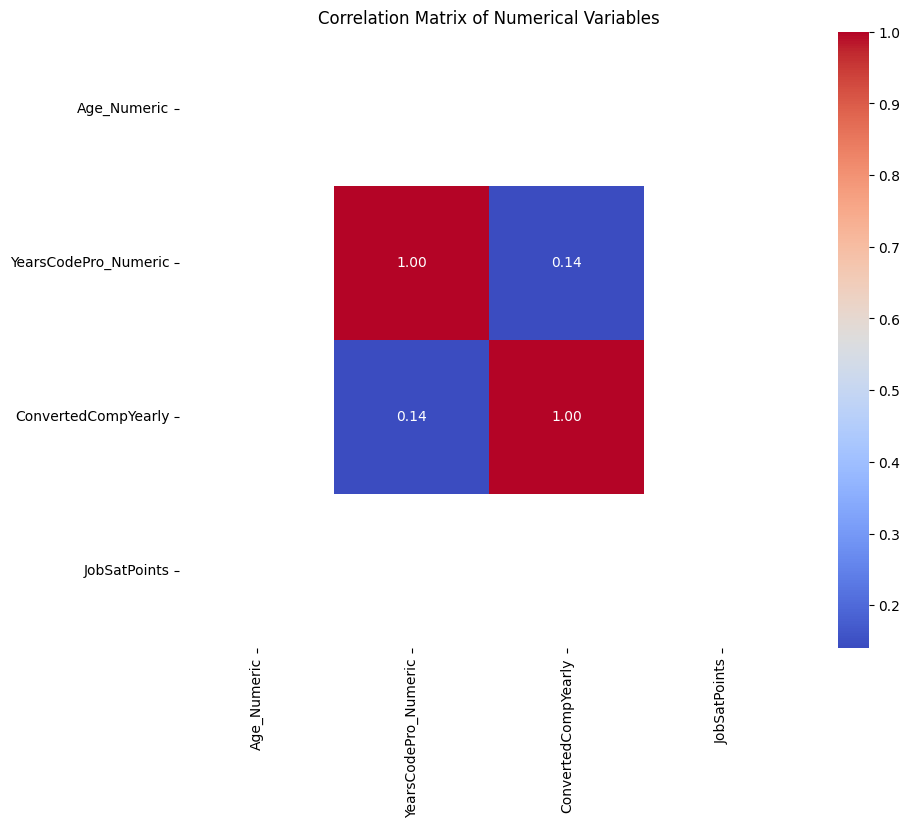

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to load and clean the dataset) ...

# 1. Map the 'Age' column to approximate numeric values (if needed)
# Assuming you have an 'Age' column with categorical values or age ranges
# Replace this with your actual age mapping if different
age_mapping = {
    'Under 18': 17,  # Example mapping for age categories
    '18-24': 21,
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60,
    '65 or older': 65
}
df['Age_Numeric'] = df['Age'].map(age_mapping)  # Create a new numeric age column

# 2. Select numerical columns for correlation analysis
# Remove 'JobSatPoints' and add 'JobSat' instead if it contains numerical values
# or create 'JobSatPoints' column using the mapping:

# Create a mapping dictionary for JobSat values to numerical values
jobsat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}

# Apply the mapping to create a new numerical JobSat column
df['JobSatPoints'] = df['JobSat'].map(jobsat_mapping)


# Convert 'YearsCodePro' to numeric, handling non-numeric values
def convert_yearscodepro(value):
    try:
        return float(value)  # Convert to float if possible
    except ValueError:
        if value == 'Less than 1 year':
            return 0.5  # Or any other suitable value for less than 1 year
        elif value == 'More than 50 years':
            return 50.0 # Or any other suitable value for more than 50 years
        else:
            return float('nan') # Return NaN for other cases that can't be converted

df['YearsCodePro_Numeric'] = df['YearsCodePro'].apply(convert_yearscodepro)

numerical_cols = ['Age_Numeric', 'YearsCodePro_Numeric', 'ConvertedCompYearly', 'JobSatPoints']  # Add other relevant columns

# 3. Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# 4. Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Summary
In this lab, you developed essential skills in Exploratory Data Analysis (EDA) with a focus on outlier detection and removal. Specifically, you:

Loaded and explored the dataset to understand its structure.

Analyzed the distribution of respondents across industries.

Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

Performed correlation analysis, including transforming the Age column into numeric values for better analysis.

**Finding Correlation**

In [40]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  \
0                                                NaN   
1  Technical documentation;Blogs;Books;Written Tu...   
2  Technical documentation;Blogs;Books;Written Tu...   
3  Stack Overflow;How-to videos;Interactive tutorial   
4  Technical documentation;Blogs;Written Tutorial...   

                                             TechDoc YearsCode YearsCodePro  \
0                                                NaN       NaN          NaN   
1  API document(s) and/or SDK document(s);User gu...        20           17   
2  API document(s) and/or SDK document(s);User gu...        37           27   
3                                                NaN         4          NaN   
4  API document(s) and/or SDK document(s);User gu...         9          NaN   

                 DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy  \
0                    NaN     NaN               NaN        NaN        NaN   
1  Developer, full-stack     NaN               NaN        NaN        NaN   
2   Developer Experience     NaN               NaN        NaN        NaN   
3  Developer, full-stack     NaN               NaN        NaN        NaN   
4  Developer, full-stack     NaN               NaN        NaN        NaN   

  TechEndorse                                            Country Currency  \
0         NaN                           United States of America      NaN   
1         NaN  United Kingdom of Great Britain and Northern I...      NaN   
2         NaN  United Kingdom of Great Britain and Northern I...      NaN   
3         NaN                                             Canada      NaN   
4         NaN                                             Norway      NaN   

   CompTotal                             LanguageHaveWorkedWith  \
0        NaN                                                NaN   
1        NaN  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2        NaN                                                 C#   
3        NaN  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4        NaN            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

                              LanguageWantToWorkWith  \
0                                                NaN   
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2  

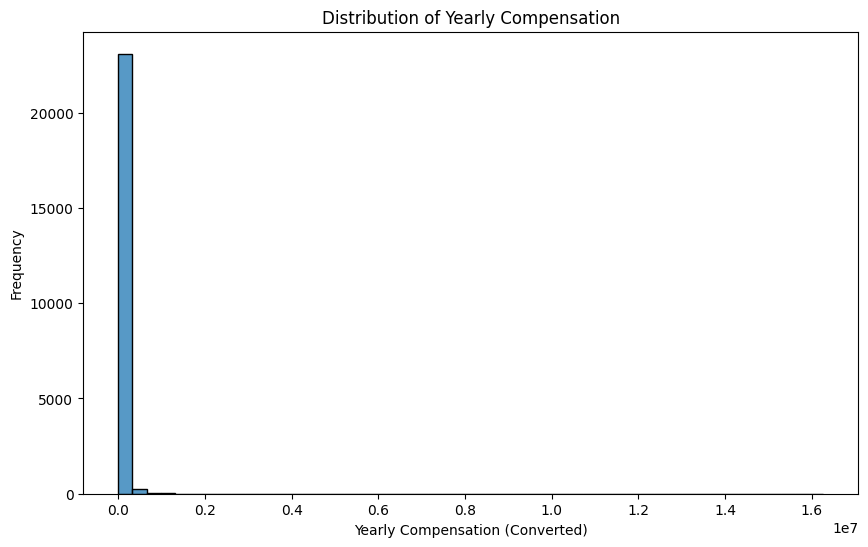

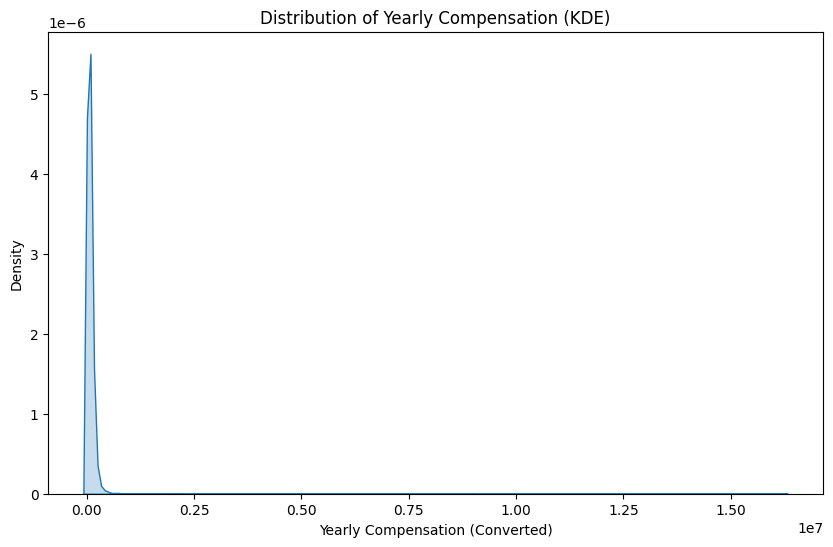

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to load and clean the dataset) ...

# 1. Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=False)  # Adjust bins as needed
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (Converted)')
plt.ylabel('Frequency')
plt.show()

# 2. KDE Plot (for a smoother representation of the distribution)
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedCompYearly'], fill=True)
plt.title('Distribution of Yearly Compensation (KDE)')
plt.xlabel('Yearly Compensation (Converted)')
plt.ylabel('Density')
plt.show()

In [43]:
import pandas as pd

# ... (previous code to load and clean the dataset) ...

# Filter for full-time employees
full_time_employees = df[df['Employment'] == 'Employed full-time']

# Calculate median compensation
median_compensation = full_time_employees['ConvertedCompYearly'].median()

# Print the result
print(f"Median Compensation for Full-Time Employees: {median_compensation}")

Median Compensation for Full-Time Employees: nan


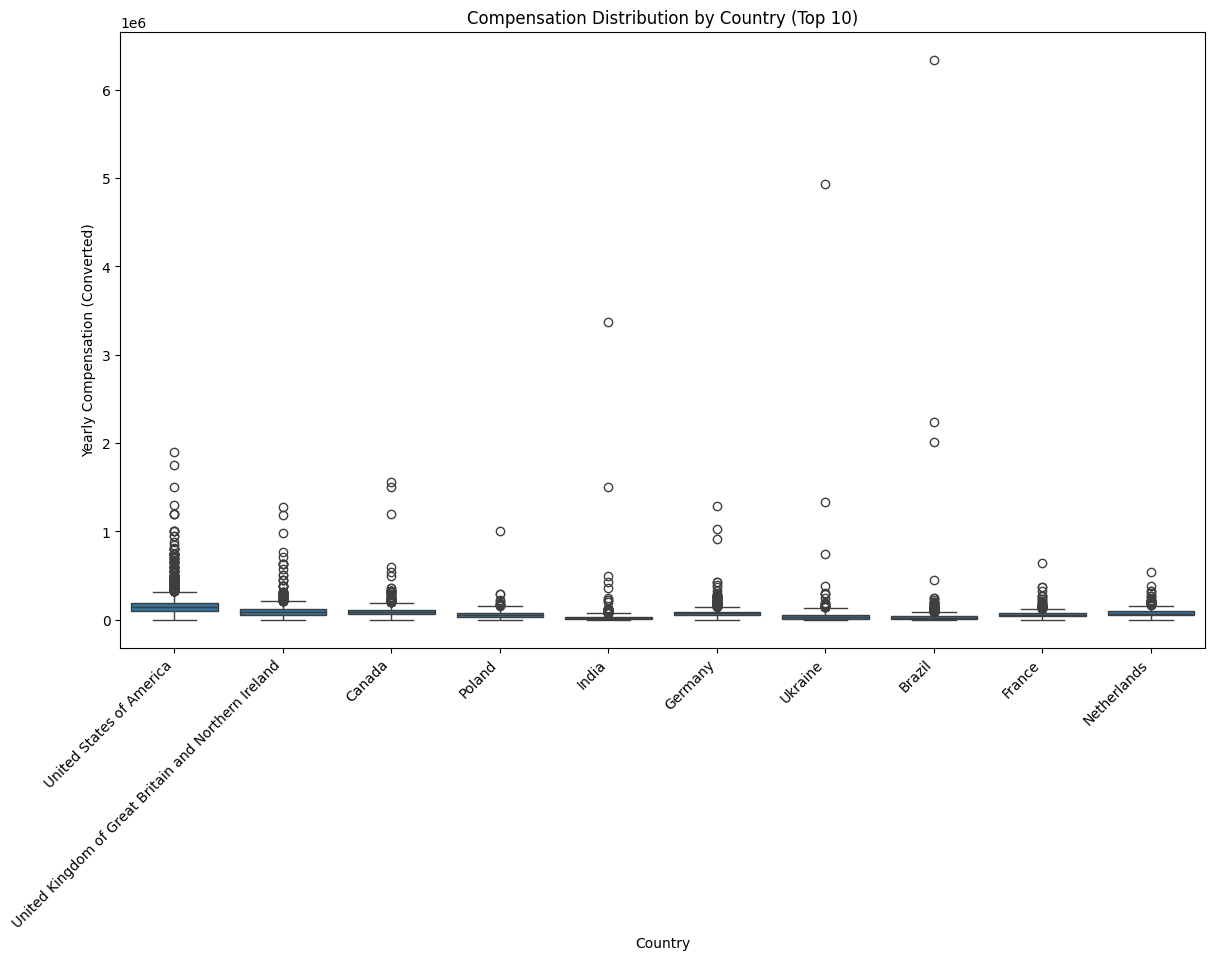

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to load and clean the dataset) ...

# 1. Filter data for relevant countries (e.g., top N countries)
top_N_countries = df['Country'].value_counts().nlargest(10).index  # Get top 10 countries
filtered_df = df[df['Country'].isin(top_N_countries)]

# 2. Create the box plot
plt.figure(figsize=(14, 8))  # Adjust figure size if needed
sns.boxplot(x='Country', y='ConvertedCompYearly', data=filtered_df)
plt.title('Compensation Distribution by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Yearly Compensation (Converted)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [45]:
import pandas as pd

# ... (previous code to load and clean the dataset) ...

# 1. Calculate IQR for 'ConvertedCompYearly'
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# 2. Determine upper and lower bounds for outliers
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# 3. Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# 4. Create a new DataFrame without outliers
df_no_outliers = df[~df['ConvertedCompYearly'].isin(outliers['ConvertedCompYearly'])]

# 5. Validate the size of the new DataFrame
print(f"\nOriginal DataFrame size: {df.shape}")
print(f"New DataFrame size (without outliers): {df_no_outliers.shape}")


Original DataFrame size: (65437, 114)
New DataFrame size (without outliers): (64459, 114)


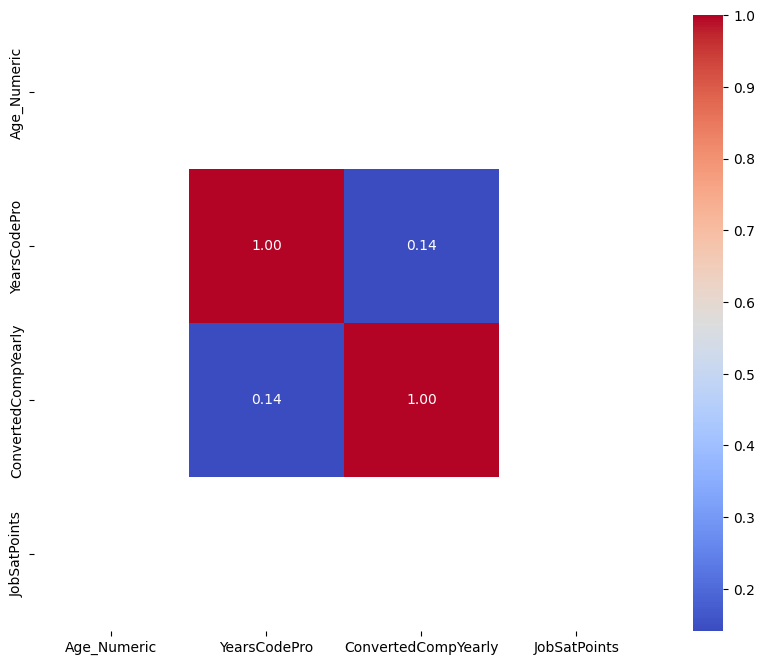

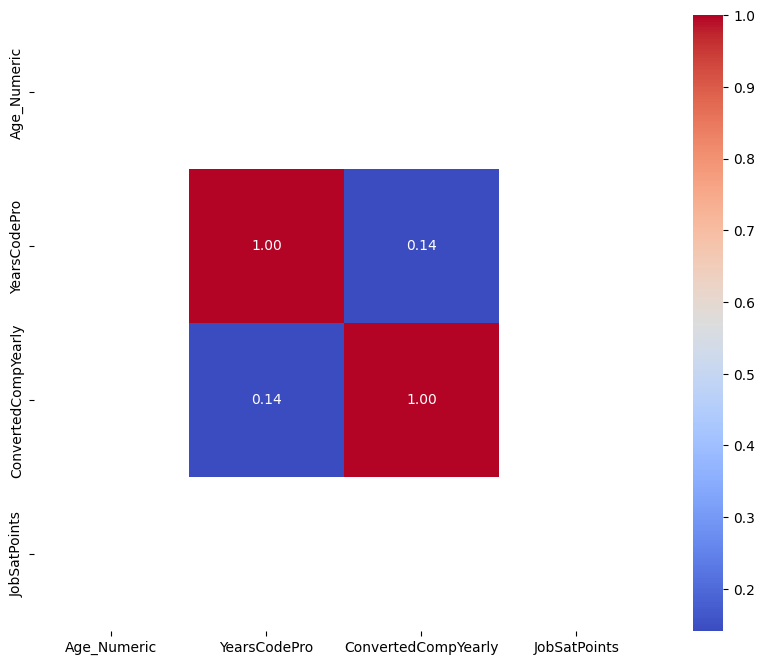

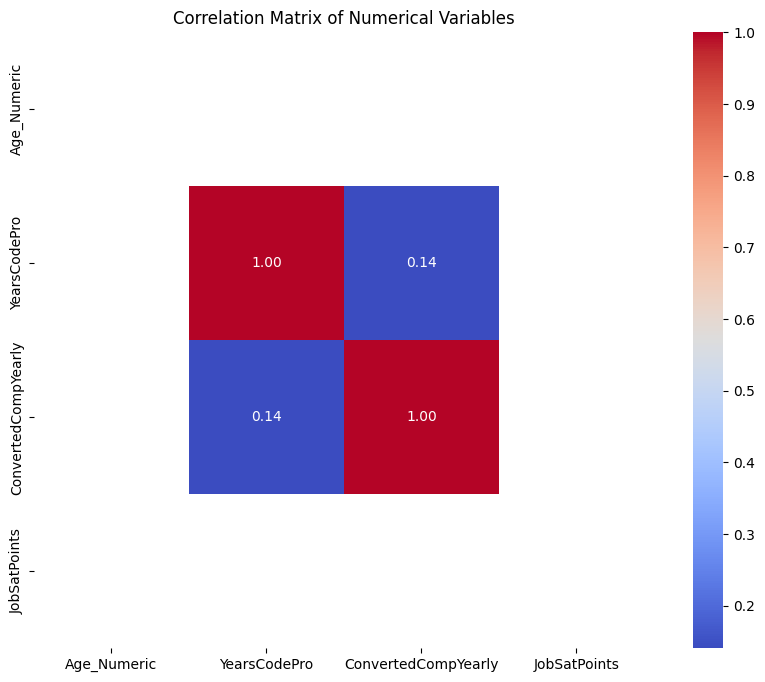

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to load and clean the dataset) ...

# 1. Map the 'Age' column to approximate numeric values (if needed)
# Assuming you have an 'Age' column with categorical values or age ranges
# Replace this with your actual age mapping if different
age_mapping = {
    'Under 18': 17,  # Example mapping for age categories
    '18-24': 21,
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60,
    '65 or older': 65
}
df['Age_Numeric'] = df['Age'].map(age_mapping)  # Create a new numeric age column

# 2. Select numerical columns for correlation analysis
# Remove 'JobSatPoints' and add 'JobSat' instead if it contains numerical values
# or create 'JobSatPoints' column using the mapping:

# Create a mapping dictionary for JobSat values to numerical values
jobsat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}

# Apply the mapping to create a new numerical JobSat column
df['JobSatPoints'] = df['JobSat'].map(jobsat_mapping)


# Convert 'YearsCodePro' to numeric, handling non-numeric values
def convert_yearscodepro(value):
    try:
        return float(value)  # Convert to float if possible
    except ValueError:
        if value == 'Less than 1 year':
            return 0.5
        elif value == 'More than 50 years':
            return 51
        else:
            return float('nan')  # Return NaN for other non-numeric values

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to load and clean the dataset) ...

# 1. Map the 'Age' column to approximate numeric values (if needed)
# Assuming you have an 'Age' column with categorical values or age ranges
# Replace this with your actual age mapping if different
age_mapping = {
    'Under 18': 17,  # Example mapping for age categories
    '18-24': 21,
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60,
    '65 or older': 65
}
df['Age_Numeric'] = df['Age'].map(age_mapping)  # Create a new numeric age column

# 2. Select numerical columns for correlation analysis
# Remove 'JobSatPoints' and add 'JobSat' instead if it contains numerical values
# or create 'JobSatPoints' column using the mapping:

# Create a mapping dictionary for JobSat values to numerical values
jobsat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}

# Apply the mapping to create a new numerical JobSat column
df['JobSatPoints'] = df['JobSat'].map(jobsat_mapping)


# Convert 'YearsCodePro' to numeric, handling non-numeric values
def convert_yearscodepro(value):
    try:
        return float(value)  # Convert to float if possible
    except ValueError:
        if value == 'Less than 1 year':
            return 0.5
        elif value == 'More than 50 years':
            return 51
        else:
            return float('nan')  # Return NaN for other non-numeric values

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_yearscodepro)

numerical_cols = ['Age_Numeric', 'YearsCodePro', 'ConvertedCompYearly', 'JobSatPoints']  # Add other relevant columns

# 3. Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# 4. Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to load and clean the dataset) ...

# 1. Map the 'Age' column to approximate numeric values (if needed)
# Assuming you have an 'Age' column with categorical values or age ranges
# Replace this with your actual age mapping if different
age_mapping = {
    'Under 18': 17,  # Example mapping for age categories
    '18-24': 21,
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60,
    '65 or older': 65
}
df['Age_Numeric'] = df['Age'].map(age_mapping)  # Create a new numeric age column

# 2. Select numerical columns for correlation analysis
# Remove 'JobSatPoints' and add 'JobSat' instead if it contains numerical values
# or create 'JobSatPoints' column using the mapping:

# Create a mapping dictionary for JobSat values to numerical values
jobsat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}

# Apply the mapping to create a new numerical JobSat column
df['JobSatPoints'] = df['JobSat'].map(jobsat_mapping)


# Convert 'YearsCodePro' to numeric, handling non-numeric values
def convert_yearscodepro(value):
    try:
        return float(value)  # Convert to float if possible
    except ValueError:
        if value == 'Less than 1 year':
            return 0.5
        elif value == 'More than 50 years':
            return 51
        else:
            return float('nan')  # Return NaN for other non-numeric values

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_yearscodepro)

numerical_cols = ['Age_Numeric', 'YearsCodePro', 'ConvertedCompYearly', 'JobSatPoints']  # Add other relevant columns

# 3. Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# 4. Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to load and clean the dataset) ...

# 1. Map the 'Age' column to approximate numeric values (if needed)
# Assuming you have an 'Age' column with categorical values or age ranges
# Replace this with your actual age mapping if different
age_mapping = {
    'Under 18': 17,  # Example mapping for age categories
    '18-24': 21,
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60,
    '65 or older': 65
}
df['Age_Numeric'] = df['Age'].map(age_mapping)  # Create a new numeric age column

# 2. Select numerical columns for correlation analysis
# Remove 'JobSatPoints' and add 'JobSat' instead if it contains numerical values
# or create 'JobSatPoints' column using the mapping:

# Create a mapping dictionary for JobSat values to numerical values
jobsat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}

# Apply the mapping to create a new numerical JobSat column
df['JobSatPoints'] = df['JobSat'].map(jobsat_mapping)


# Convert 'YearsCodePro' to numeric, handling non-numeric values
def convert_yearscodepro(value):
    try:
        return float(value)  # Convert to float if possible
    except ValueError:
        if value == 'Less than 1 year':
            return 0.5
        elif value == 'More than 50 years':
            return 51
        else:
            return float('nan')  # Return NaN for other non-numeric values

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_yearscodepro)

numerical_cols = ['Age_Numeric', 'YearsCodePro', 'ConvertedCompYearly', 'JobSatPoints']  # Add other relevant columns

# 3. Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# 4. Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()
plt.show()

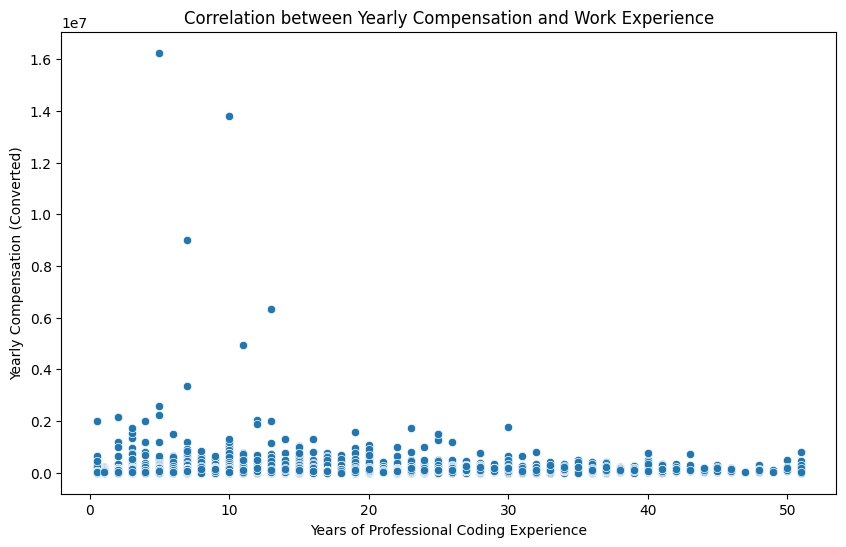

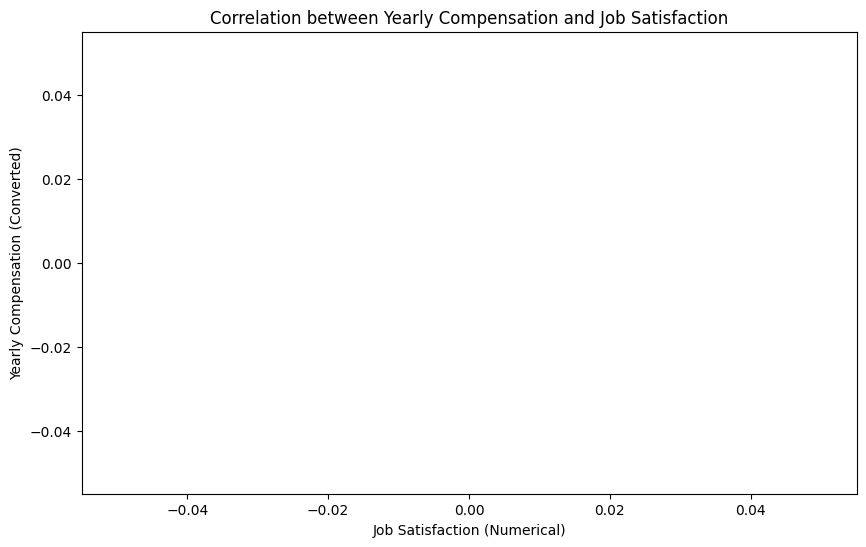

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to load and clean the dataset) ...

# Assuming 'YearsCodePro' represents work experience
# Make sure 'YearsCodePro' is numeric (if not, convert it as in previous steps)
# and 'JobSatPoints' is also numeric (or create it using mapping)


# 1. Scatter plot for ConvertedCompYearly vs. YearsCodePro (WorkExp)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='ConvertedCompYearly', data=df)
plt.title('Correlation between Yearly Compensation and Work Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Yearly Compensation (Converted)')
plt.show()

# 2. Scatter plot for ConvertedCompYearly vs. JobSatPoints
plt.figure(figsize=(10, 6))
sns.scatterplot(x='JobSatPoints', y='ConvertedCompYearly', data=df)
plt.title('Correlation between Yearly Compensation and Job Satisfaction')
plt.xlabel('Job Satisfaction (Numerical)')
plt.ylabel('Yearly Compensation (Converted)')
plt.show()

Summary
In this lab, you practiced essential skills in correlation analysis by:

Examining the distribution of yearly compensation with histograms and box plots.
Detecting and removing outliers from compensation data.
Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.
By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.
